In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import to_hex
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [2]:
df = pd.read_csv('C:/Users/Lympha/Desktop/temp_dir/result_dataframes/pyrosetta_total_energy_dataframe.csv')

In [3]:
print(df.info)

<bound method DataFrame.info of     Unnamed: 0     pos1:M    pos2:T    pos3:E     pos4:Y     pos5:K  \
0         1A2B   3.712205  6.918612 -2.156505        NaN   0.146347   
1         1AA9  28.627418  9.236940  1.196628   4.293810  11.361039   
2         1AGP  11.054168 -1.911182  0.095264  -4.621200   0.688334   
3         1AM4        NaN       NaN       NaN  14.265351        NaN   
4         1AN0   9.586680       NaN       NaN        NaN        NaN   
..         ...        ...       ...       ...        ...        ...   
376       8DNJ   2.769051 -0.613654  0.494706  -5.067340   2.661227   
377       8EBZ        NaN       NaN       NaN        NaN        NaN   
378       8EZG  11.296190  2.148717  7.416110  -3.235184   6.531090   
379       8F0M        NaN       NaN  0.534018        NaN        NaN   
380       8IJ9   0.871683  1.357745 -2.402894   1.352759   1.881382   

        pos6:L     pos7:V     pos8:V     pos9:V  ...  pos180:G  pos181:C  \
0     3.026592  -4.161705  -2.708358  -

In [4]:
print(df.head)

<bound method NDFrame.head of     Unnamed: 0     pos1:M    pos2:T    pos3:E     pos4:Y     pos5:K  \
0         1A2B   3.712205  6.918612 -2.156505        NaN   0.146347   
1         1AA9  28.627418  9.236940  1.196628   4.293810  11.361039   
2         1AGP  11.054168 -1.911182  0.095264  -4.621200   0.688334   
3         1AM4        NaN       NaN       NaN  14.265351        NaN   
4         1AN0   9.586680       NaN       NaN        NaN        NaN   
..         ...        ...       ...       ...        ...        ...   
376       8DNJ   2.769051 -0.613654  0.494706  -5.067340   2.661227   
377       8EBZ        NaN       NaN       NaN        NaN        NaN   
378       8EZG  11.296190  2.148717  7.416110  -3.235184   6.531090   
379       8F0M        NaN       NaN  0.534018        NaN        NaN   
380       8IJ9   0.871683  1.357745 -2.402894   1.352759   1.881382   

        pos6:L     pos7:V     pos8:V     pos9:V  ...  pos180:G  pos181:C  \
0     3.026592  -4.161705  -2.708358  -1.

In [5]:
metadata_df = pd.read_csv('C:/Users/Lympha/Desktop/temp_dir/result_dataframes/metadata_dataframe.csv')

metadata_df.head()

Unnamed: 0                                              Title  \
0       1A2B             HUMAN RHOA COMPLEXED WITH GTP ANALOGUE   
1       1AA9  HUMAN C-HA-RAS(1-171)(DOT)GDP, NMR, MINIMIZED ...   
2       1AGP  THREE-DIMENSIONAL STRUCTURES AND PROPERTIES OF...   
3       1AM4  COMPLEX BETWEEN CDC42HS.GMPPNP AND P50 RHOGAP ...   
4       1AN0                                CDC42HS-GDP COMPLEX   

                                   Structure Details Source Organism  \
0                                                NaN    Homo sapiens   
1                                                NaN    Homo sapiens   
2  C-H-RAS P21 PROTEIN MUTANT WITH GLY 12 REPLACE...    Homo sapiens   
3                                                NaN    Homo sapiens   
4                                                NaN    Homo sapiens   

   Taxonomy ID                                           Abstract  \
0         9606  The 2.4-A resolution crystal structure of a do...   
1         9606  The backbone 1H, 13C, and 15N resonances of th...   
2         9606  The three-dimensional structures and biochemic...   
3         9606  Small G proteins transduce signals from plasma...   
4         9606                                       No DOI found   

              Method  Resolution  Original Number of Models  \
0  x-ray diffraction         2.4                          1   
1       solution nmr         NaN                          1   
2  x-ray diffraction         2.3                          1   
3  x-ray diffraction         2.7                          1   
4  x-ray diffraction         2.8                          1   

   Original Number of Chains  ... Number of ILE Number of GLN Number of ASN  \
0                          1  ...            10             5             6   
1                          1  ...            11            11             4   
2                          1  ...            11            11             4   
3                          6  ...             8             6             5   
4                          2  ...             8             6             5   

   Number of HIS  Number of PHE  Number of ASP  Number of PRO Number of ARG  \
0            2.0              7             15           11.0            10   
1            3.0              5             14            3.0            12   
2            3.0              5             15            3.0            11   
3            2.0              8             11           12.0             5   
4            2.0              8             11           15.0             6   

  Number of CYS Number of TRP  
0           5.0           2.0  
1           3.0           NaN  
2           3.0           NaN  
3           5.0           1.0  
4           6.0           1.0  

[5 rows x 42 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

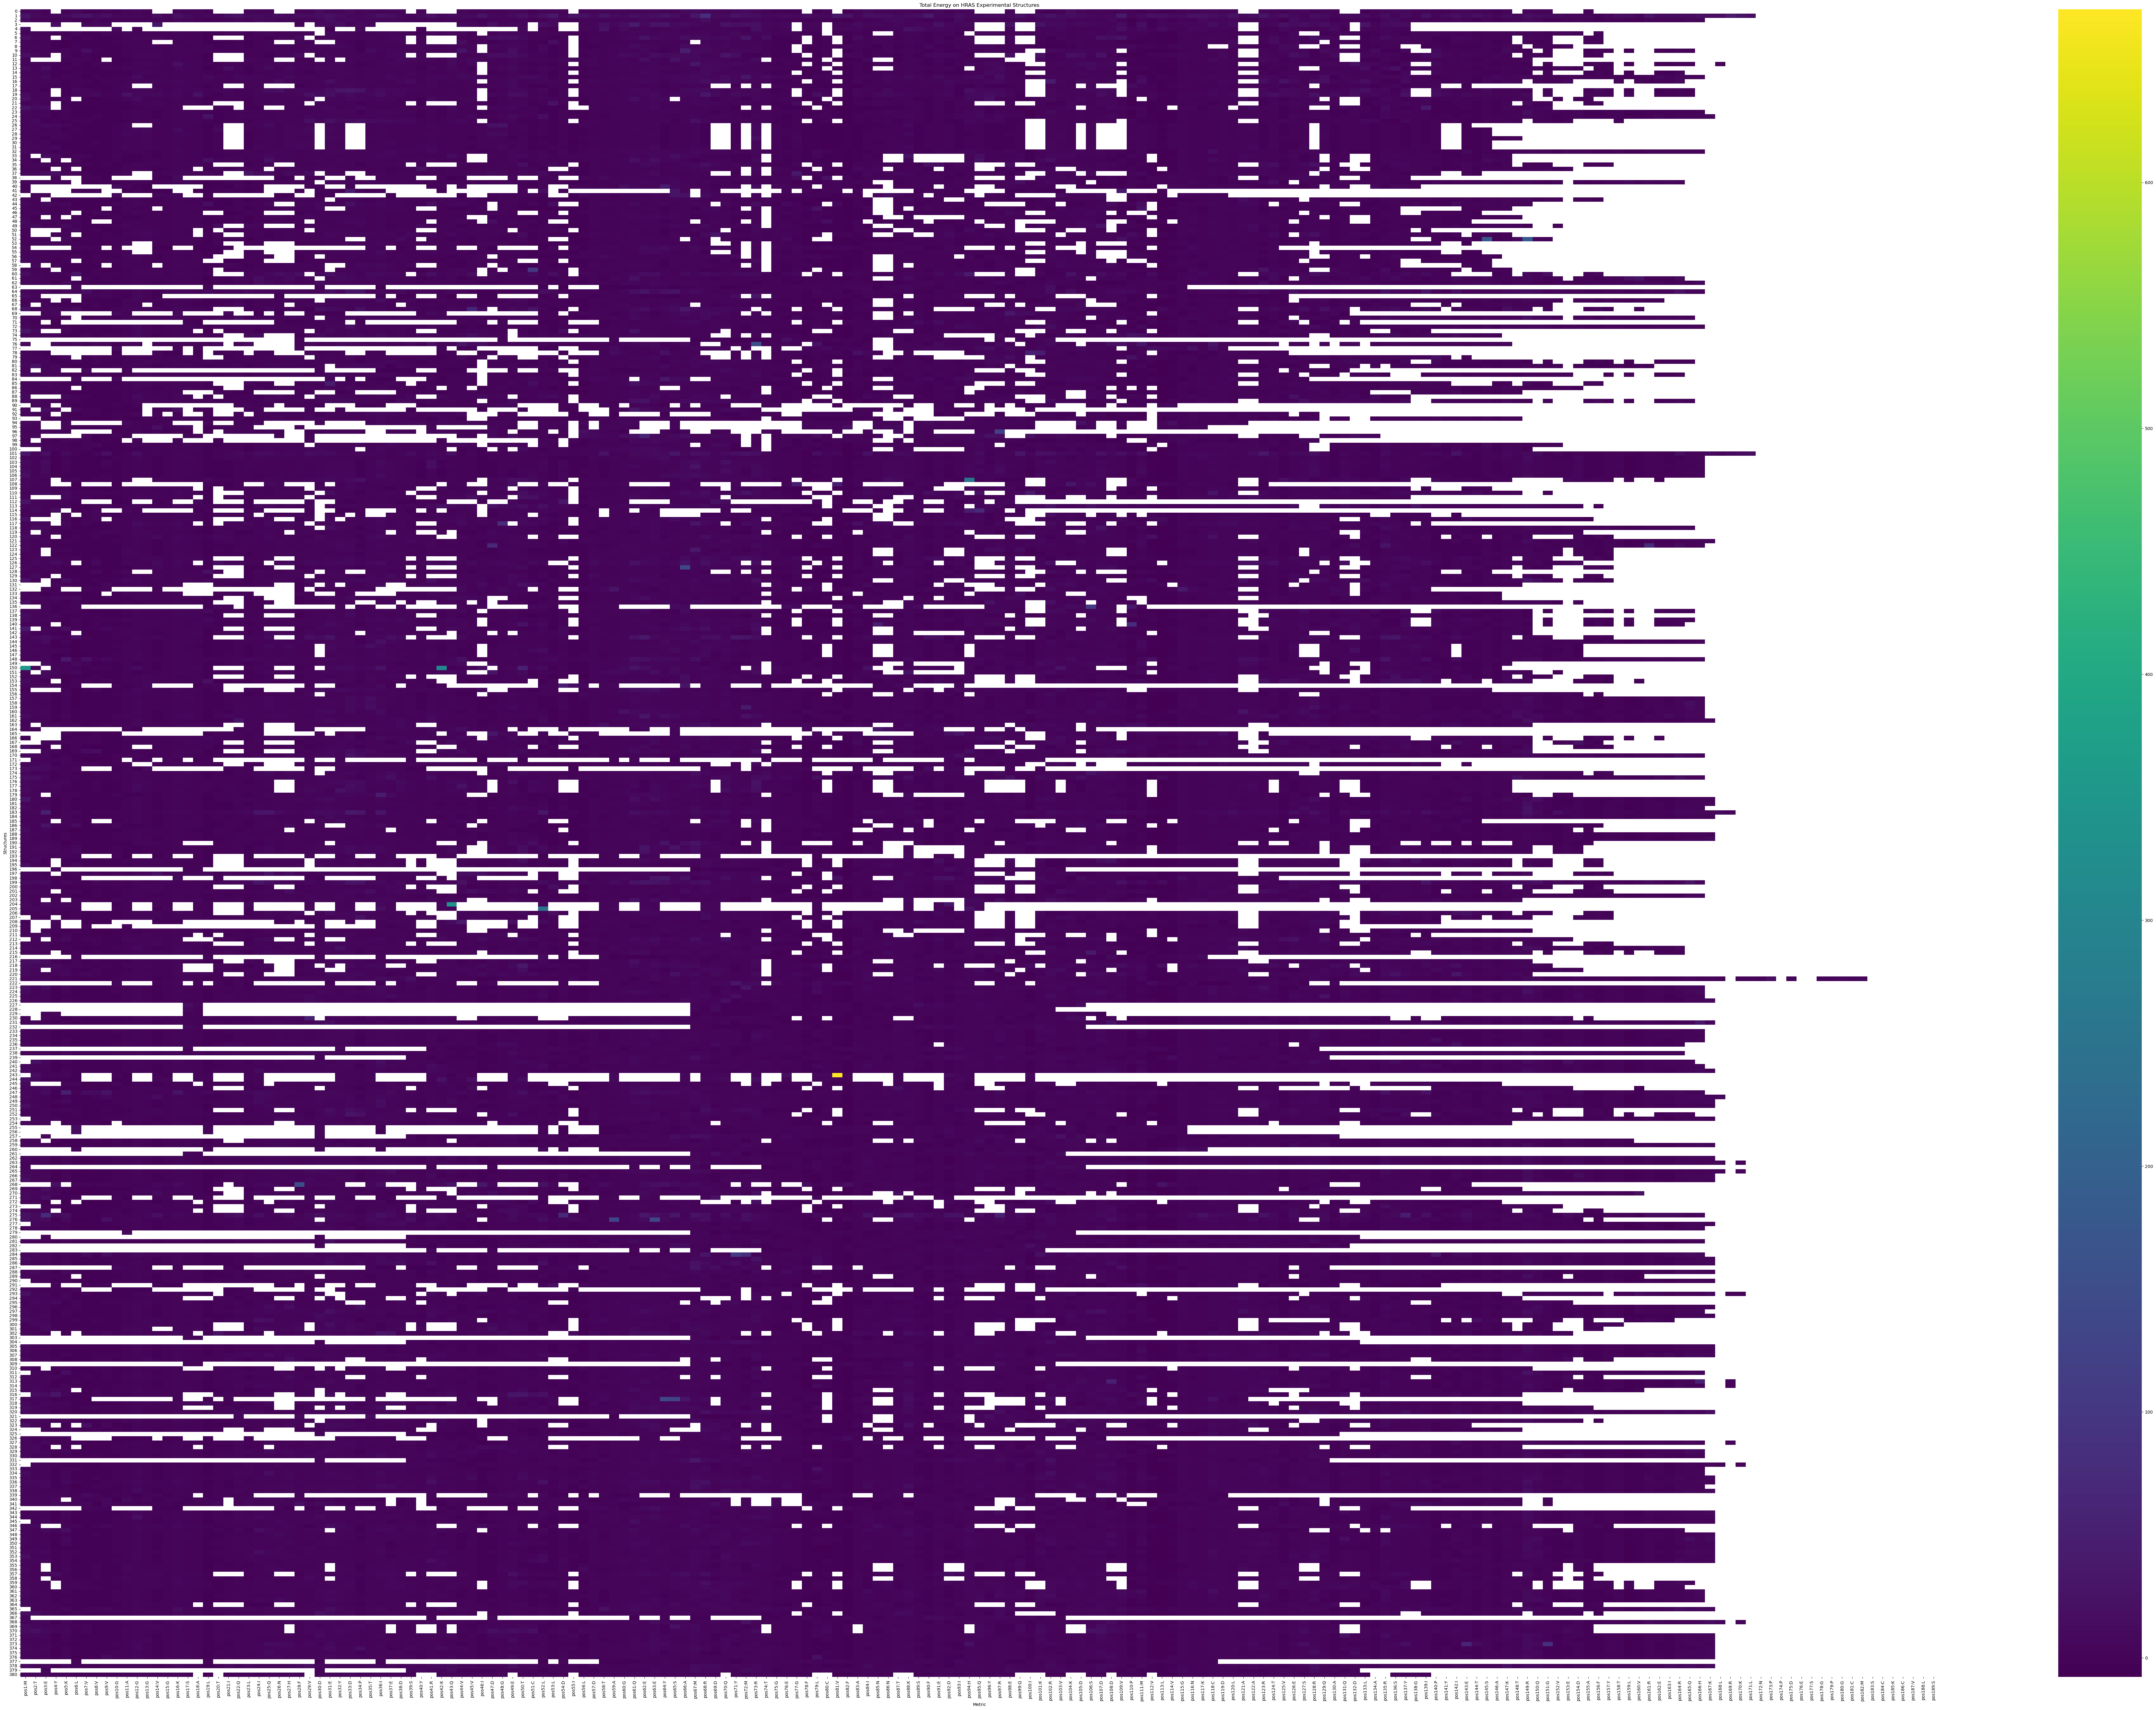

In [6]:
plt.figure(figsize=(100,70))
sns.heatmap(df.drop(columns=['Unnamed: 0']), cmap='viridis')
plt.title('Total Energy on HRAS Experimental Structures')
plt.xlabel('Metric')
plt.ylabel('Structures')
plt.show

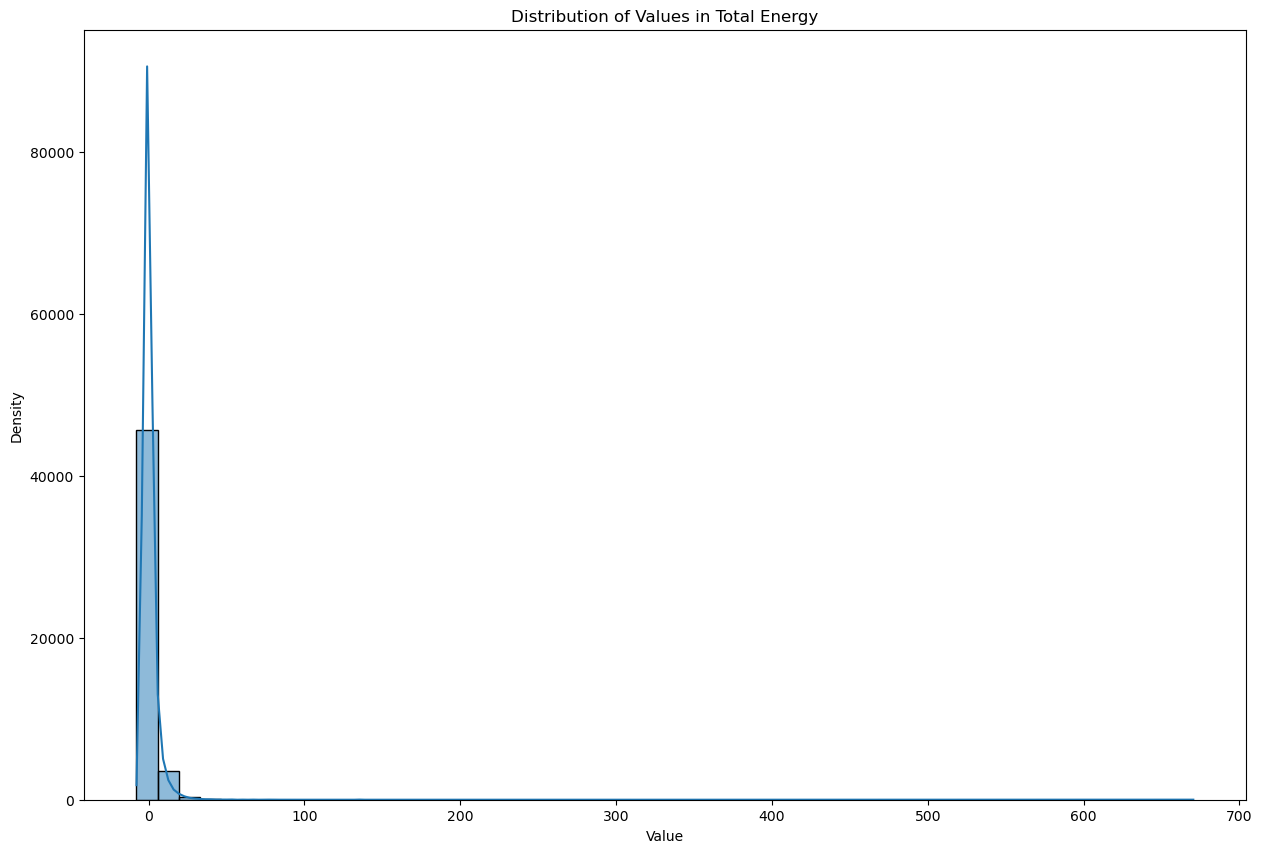

In [7]:
plt.figure(figsize=(15,10))
sns.histplot(df.drop(columns=['Unnamed: 0']).values.flatten(), bins=50, kde=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Values in Total Energy')
plt.show()

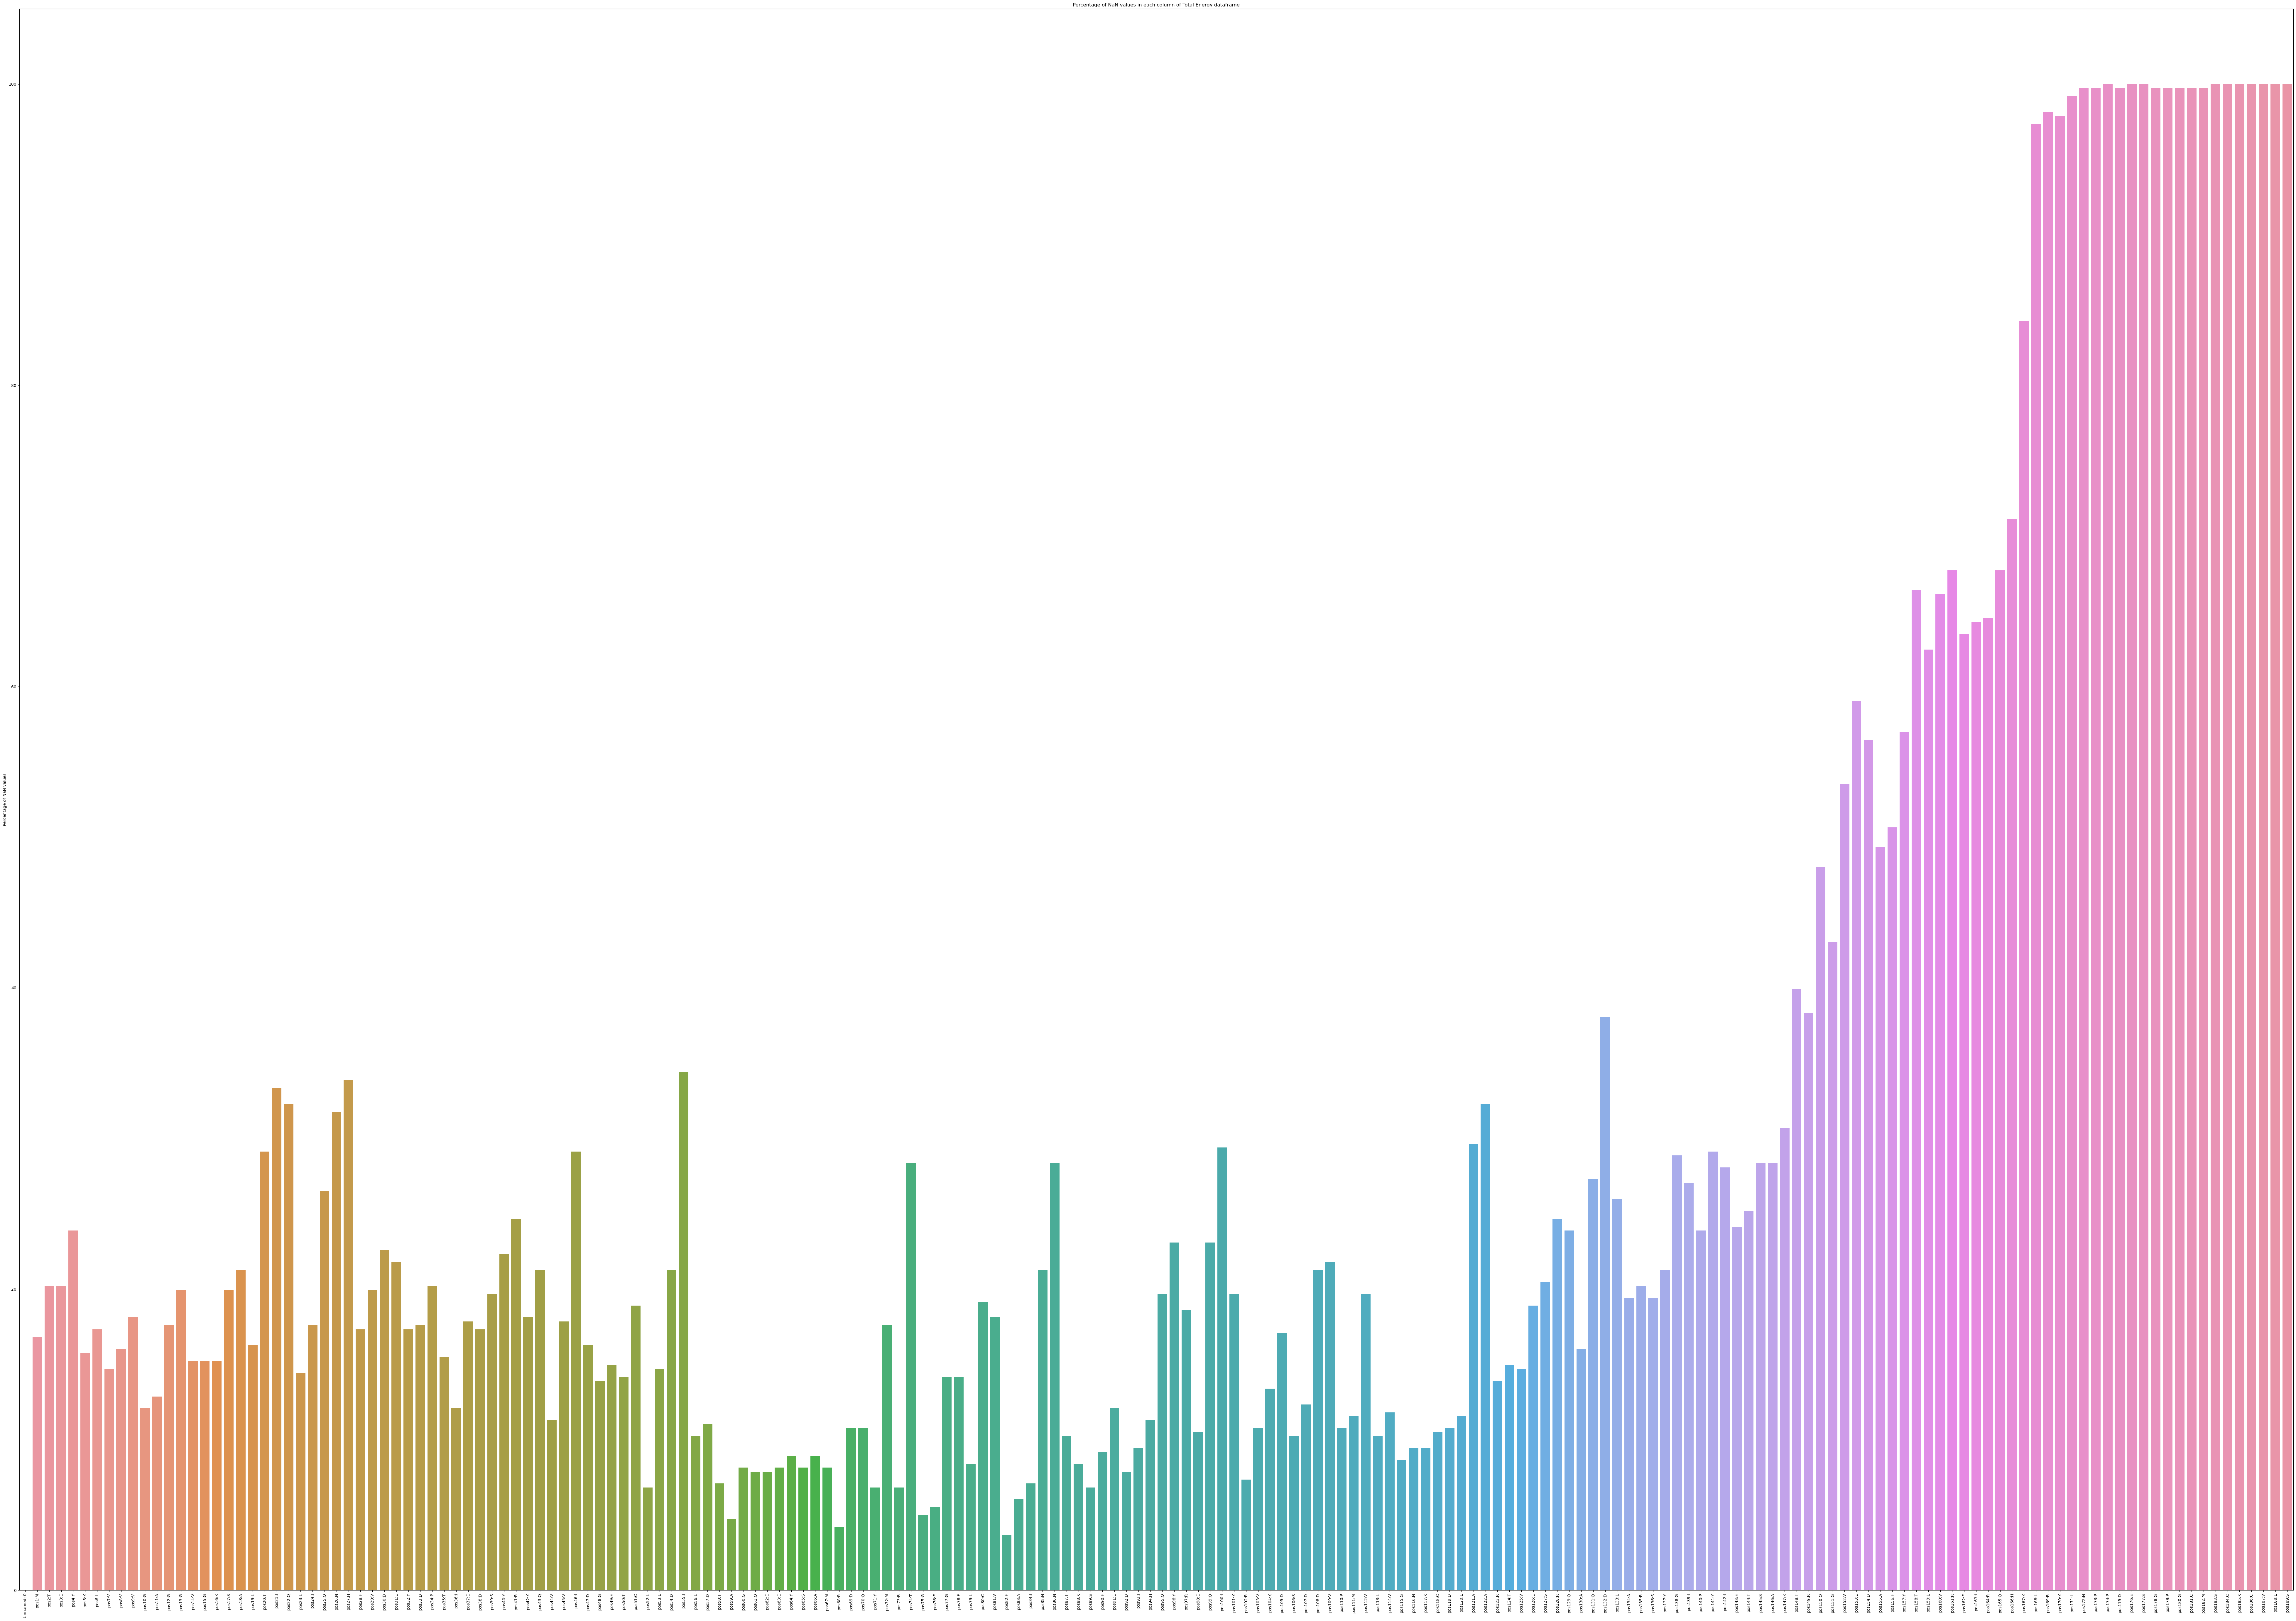

In [8]:
nan_percentage = df.isnull().mean() * 100


plt.figure(figsize=(100,70))
sns.barplot(x=nan_percentage.index, y=nan_percentage.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in each column of Total Energy dataframe')
plt.show()

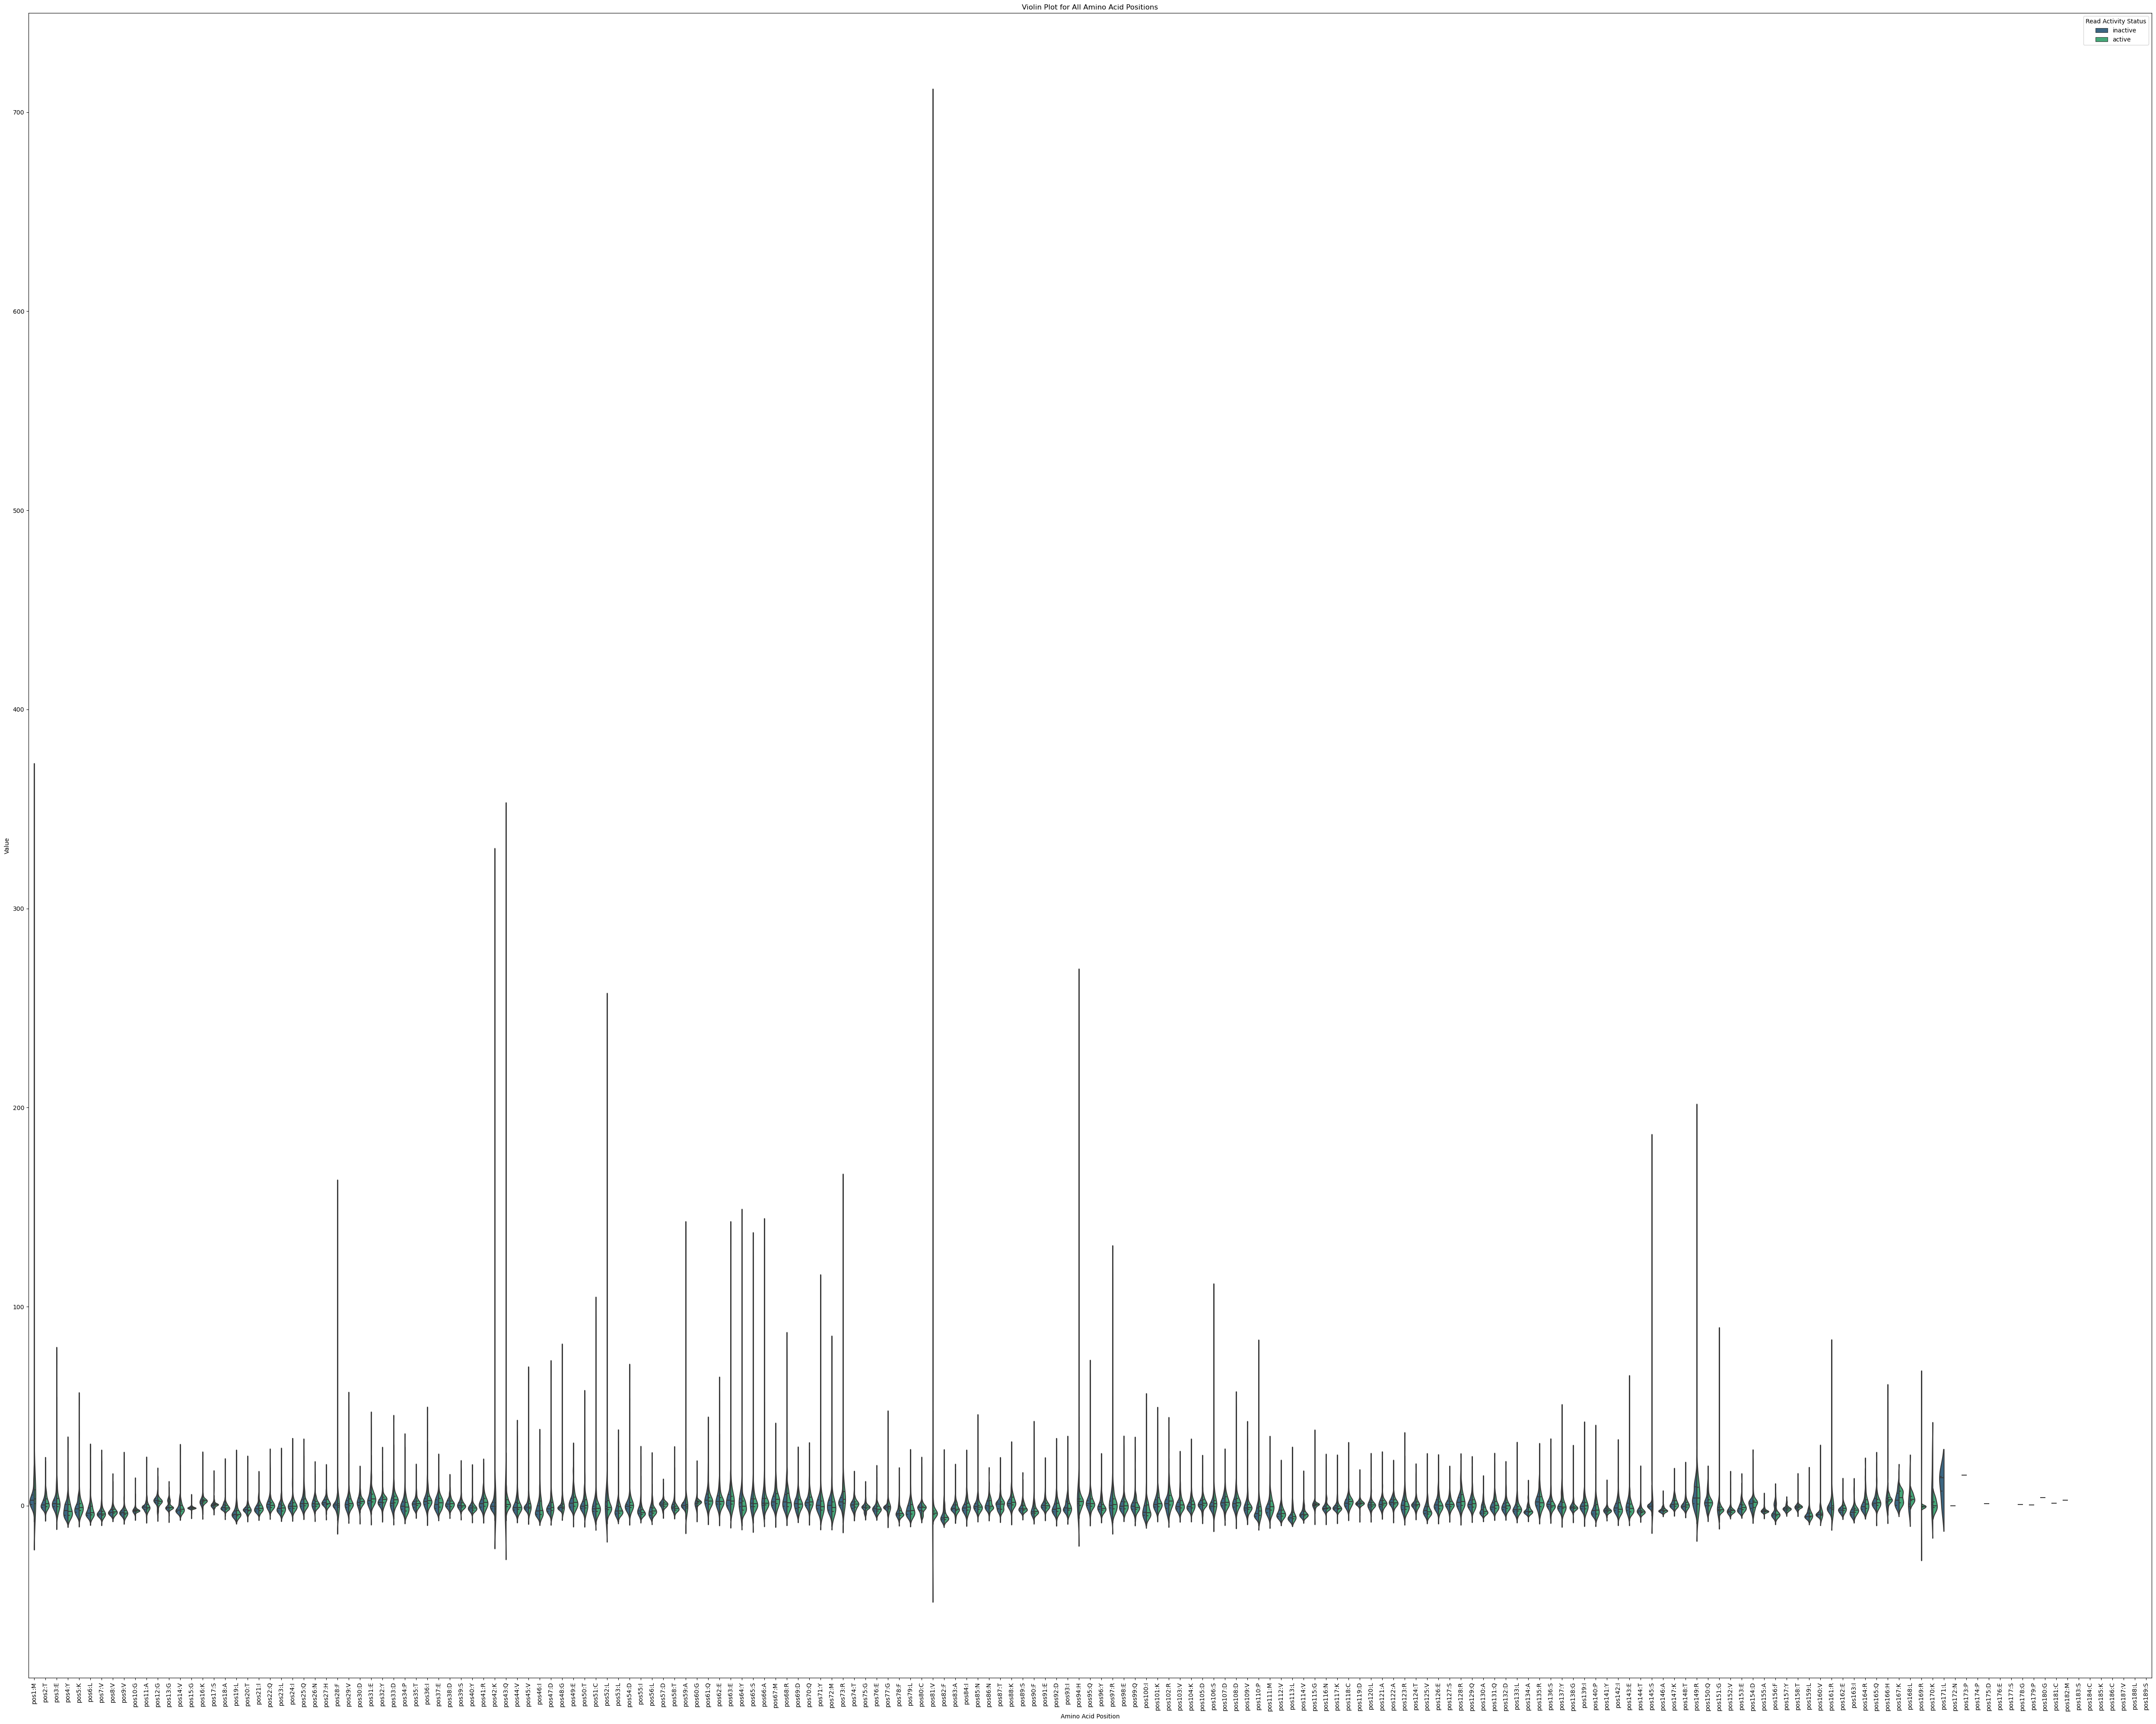

In [9]:
merged_nonnorm_df = pd.merge(df, metadata_df[['Unnamed: 0', 'Read Activity Status']], on='Unnamed: 0')

melted_nonnorm = pd.melt(merged_nonnorm_df, id_vars=['Unnamed: 0', 'Read Activity Status'], var_name='Amino Acid Position', value_name='Value')


plt.figure(figsize=(50,40))


sns.violinplot(x="Amino Acid Position", y="Value", hue="Read Activity Status", data=melted_nonnorm, split=True, inner="quart", palette="viridis")


plt.xticks(rotation=90)


plt.title('Violin Plot for All Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Read Activity Status')


plt.tight_layout()


plt.show()

In [10]:
protein_codes = df['Unnamed: 0']


feature_df_numeric = df.drop(columns=['Unnamed: 0'])


scaler = StandardScaler()
feature_normalized = scaler.fit_transform(feature_df_numeric)


feature_normalized_df = pd.DataFrame(feature_normalized, columns=feature_df_numeric.columns)


feature_normalized_df.fillna(0, inplace=True)

C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


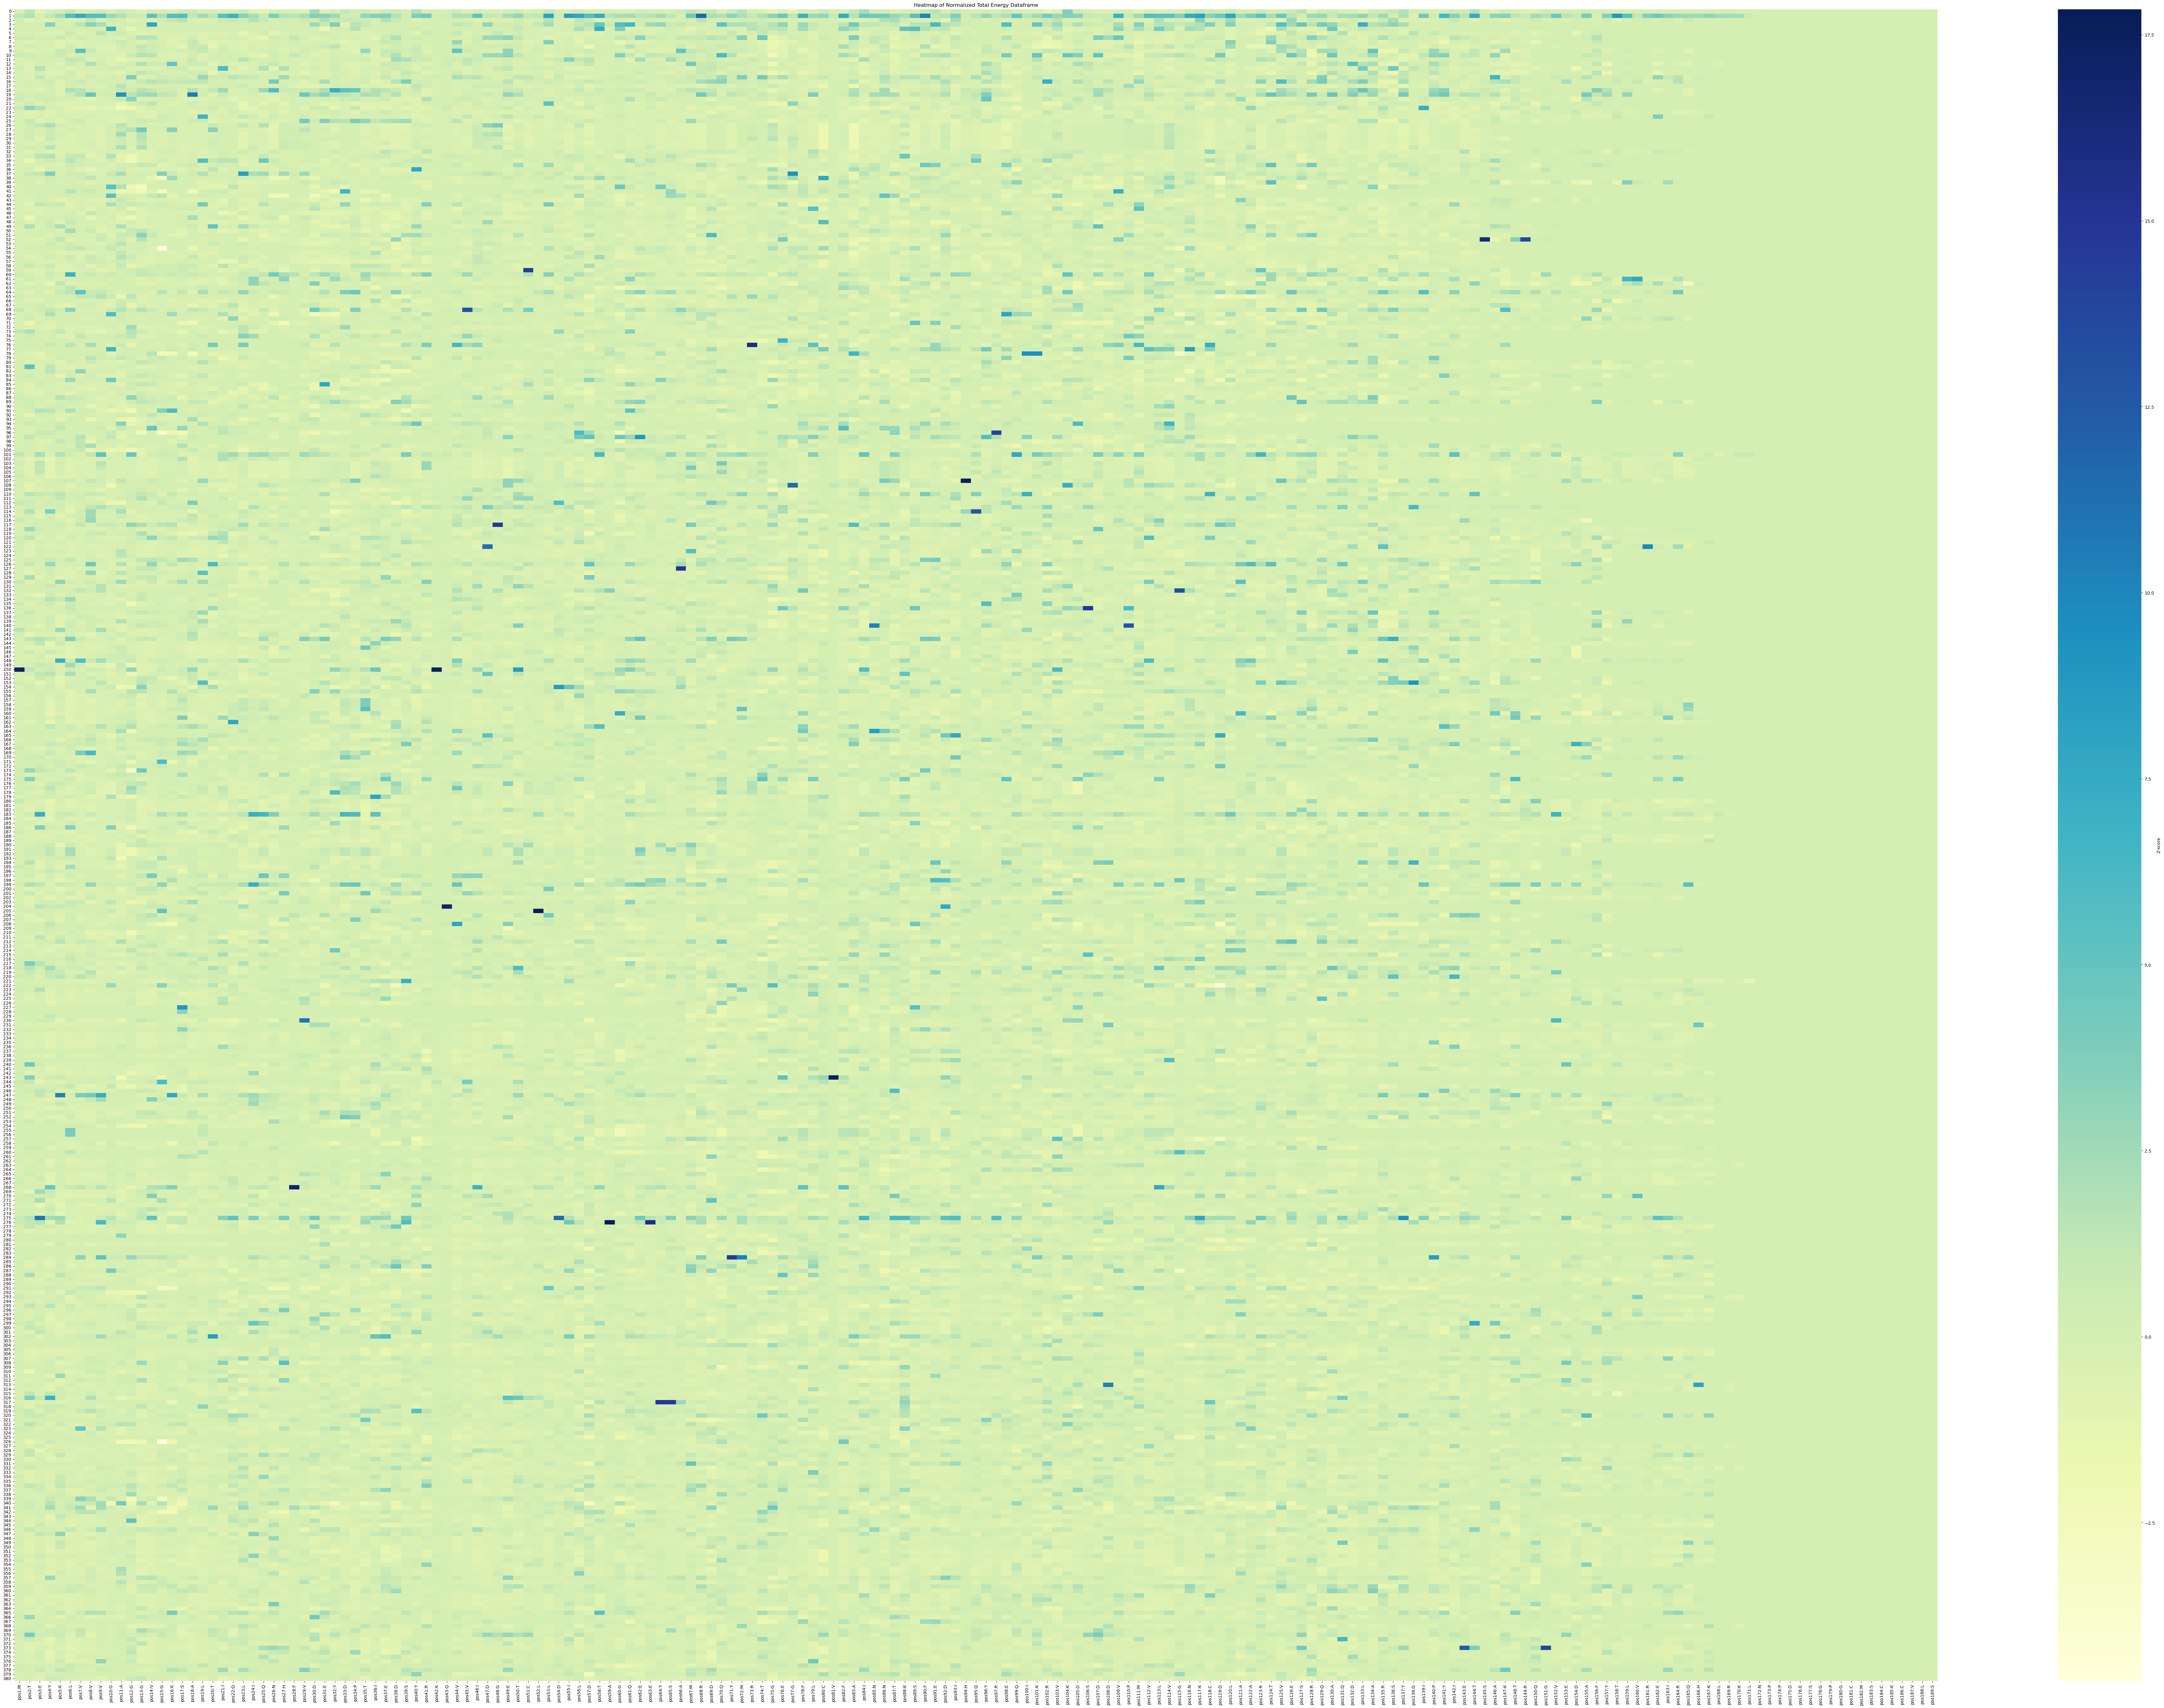

In [11]:
plt.figure(figsize=(100,70))
sns.heatmap(feature_normalized_df, cmap="YlGnBu", cbar_kws={'label': 'Z-score'})
plt.title('Heatmap of Normalized Total Energy Dataframe')
plt.show()

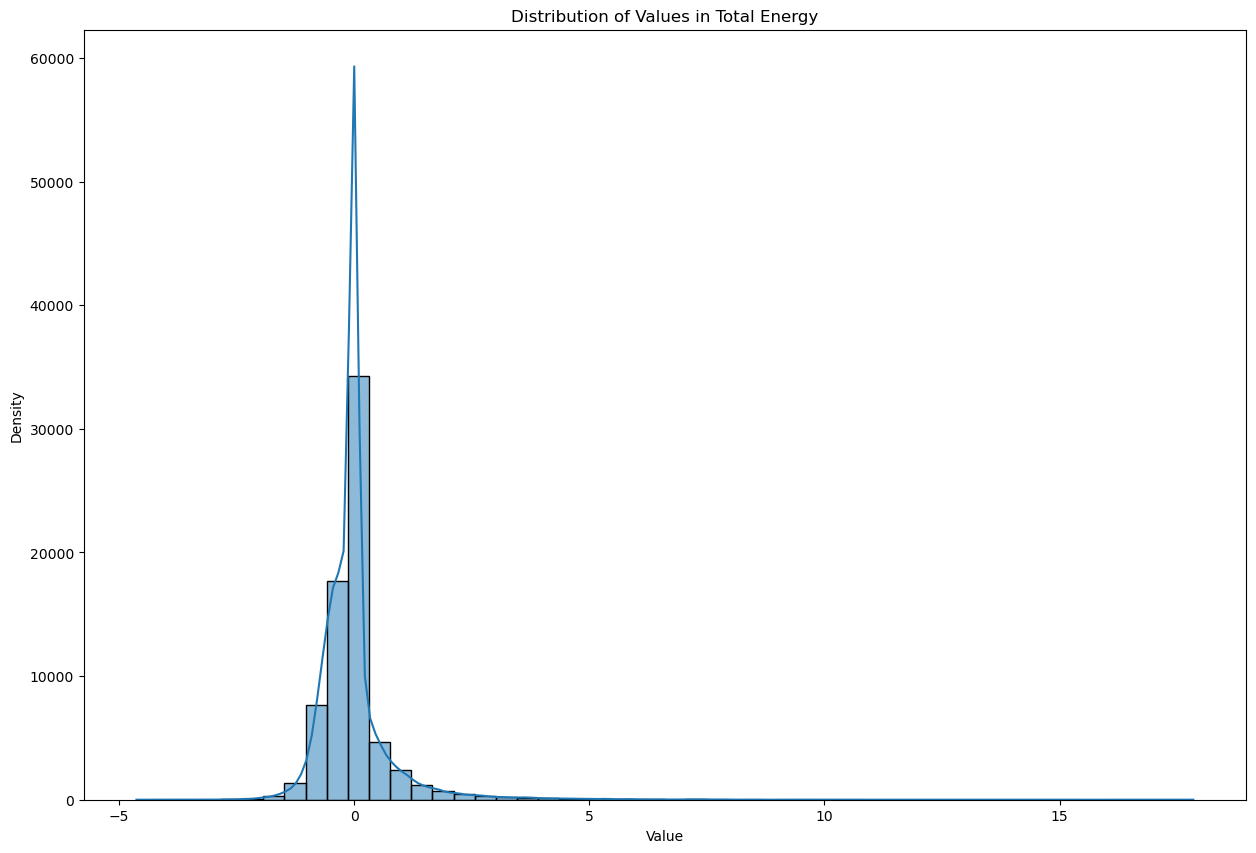

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(feature_normalized_df.values.flatten(), bins=50, kde=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Values in Total Energy')
plt.show()

In [13]:
merged_df = pd.merge(feature_normalized_df, metadata_df, left_on=protein_codes, right_on="Unnamed: 0")


X = feature_normalized_df
y = metadata_df["Read Activity Status"]
y_factorized = pd.factorize(y)[0]


merged_df.head()

pos1:M    pos2:T    pos3:E    pos4:Y    pos5:K    pos6:L    pos7:V  \
0 -0.117214  1.306119 -0.693412  0.000000  0.074375  1.212173 -0.314369   
1  1.099927  1.903896 -0.186614  1.295191  2.252574  5.621678  7.432344   
2  0.241451 -0.970627 -0.353076 -0.641148  0.179644 -0.452226 -0.569569   
3  0.000000  0.000000  0.000000  3.461008  0.000000  0.000000  1.585761   
4  0.169762  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     pos8:V    pos9:V   pos10:G  ...  Number of ILE  Number of GLN  \
0 -0.073013  0.389946 -0.363697  ...             10              5   
1  5.695009  5.718141  2.714835  ...             11             11   
2  1.086234 -0.466234  0.291596  ...             11             11   
3  3.378327  2.136914  0.000000  ...              8              6   
4  0.000000  0.000000  6.964389  ...              8              6   

   Number of ASN  Number of HIS  Number of PHE  Number of ASP  Number of PRO  \
0              6            2.0              7             15           11.0   
1              4            3.0              5             14            3.0   
2              4            3.0              5             15            3.0   
3              5            2.0              8             11           12.0   
4              5            2.0              8             11           15.0   

   Number of ARG  Number of CYS  Number of TRP  
0             10            5.0            2.0  
1             12            3.0            NaN  
2             11            3.0            NaN  
3              5            5.0            1.0  
4              6            6.0            1.0  

[5 rows x 231 columns]

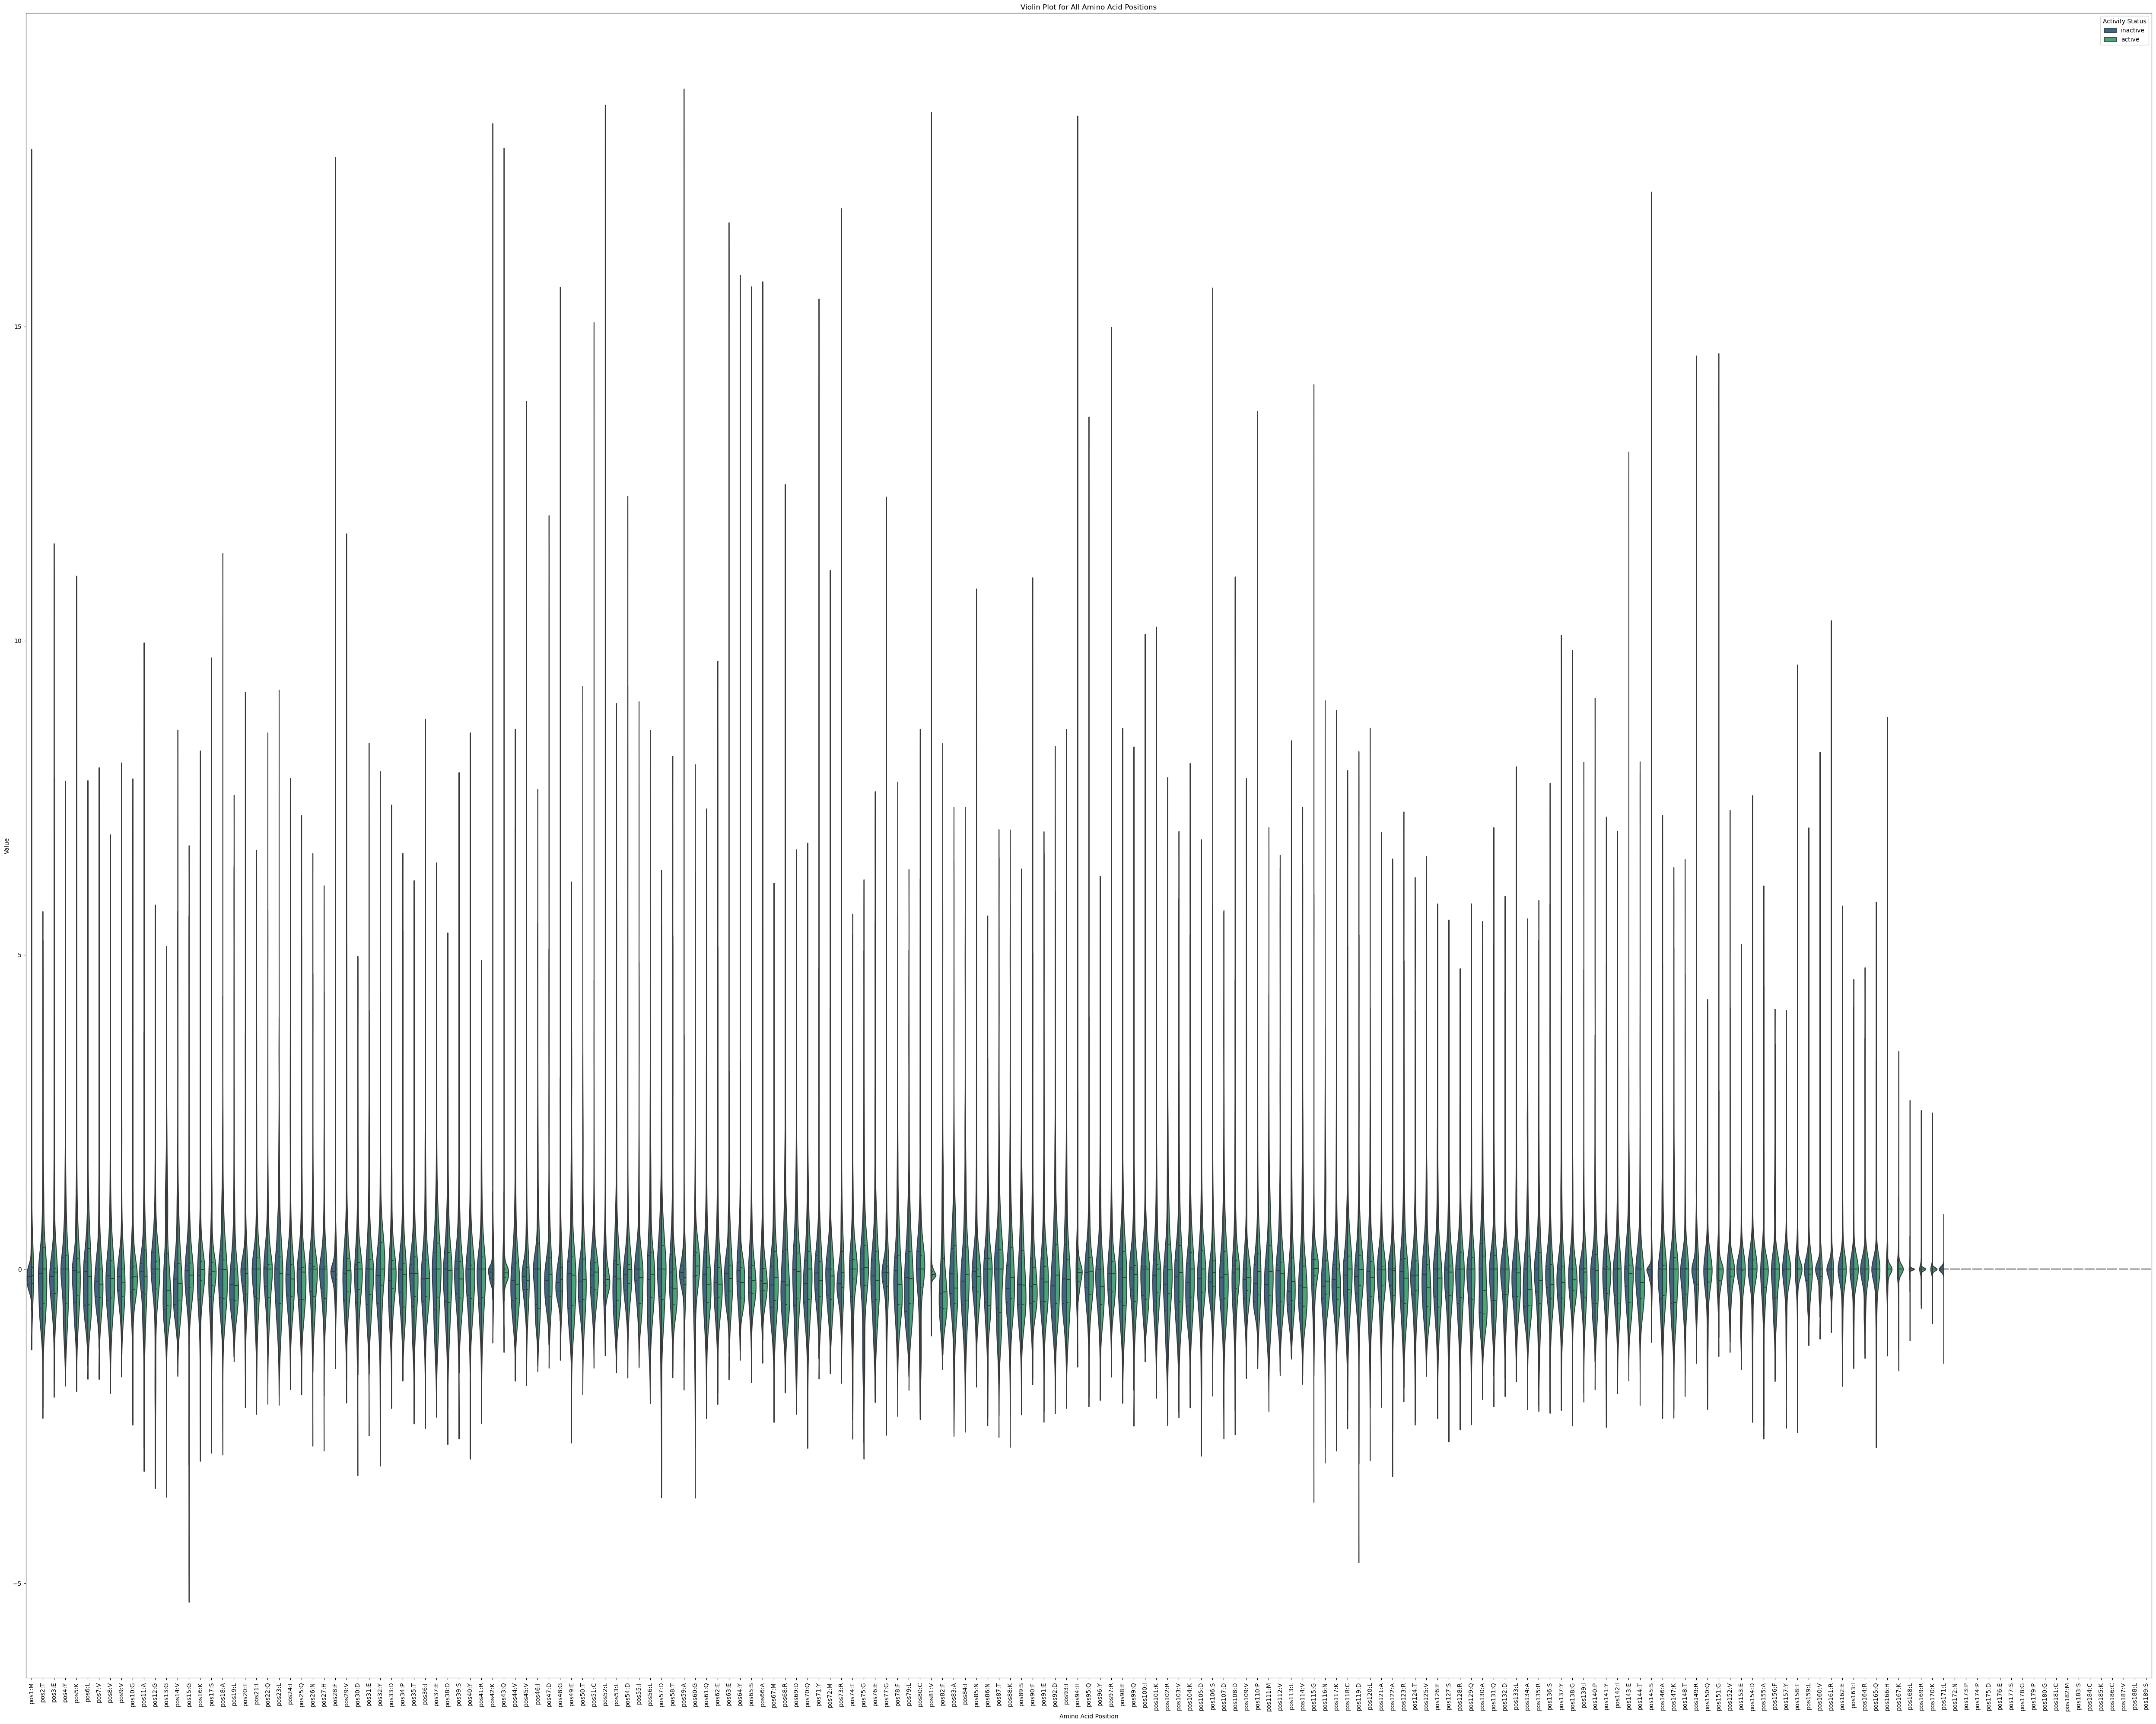

In [14]:
melted_data = pd.melt(X.iloc[:, :len(feature_normalized_df.columns)], value_vars=X.iloc[:, :len(feature_normalized_df.columns)].columns)
melted_data['Activity Status'] = np.tile(y, len(X.columns[:len(feature_normalized_df.columns)]))


plt.figure(figsize=(50,40))
sns.violinplot(x="variable", y="value", hue="Activity Status", data=melted_data, split=True, inner="quart", palette="viridis")
plt.xticks(rotation=90)
plt.title('Violin Plot for All Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Activity Status')
plt.tight_layout()
plt.show()

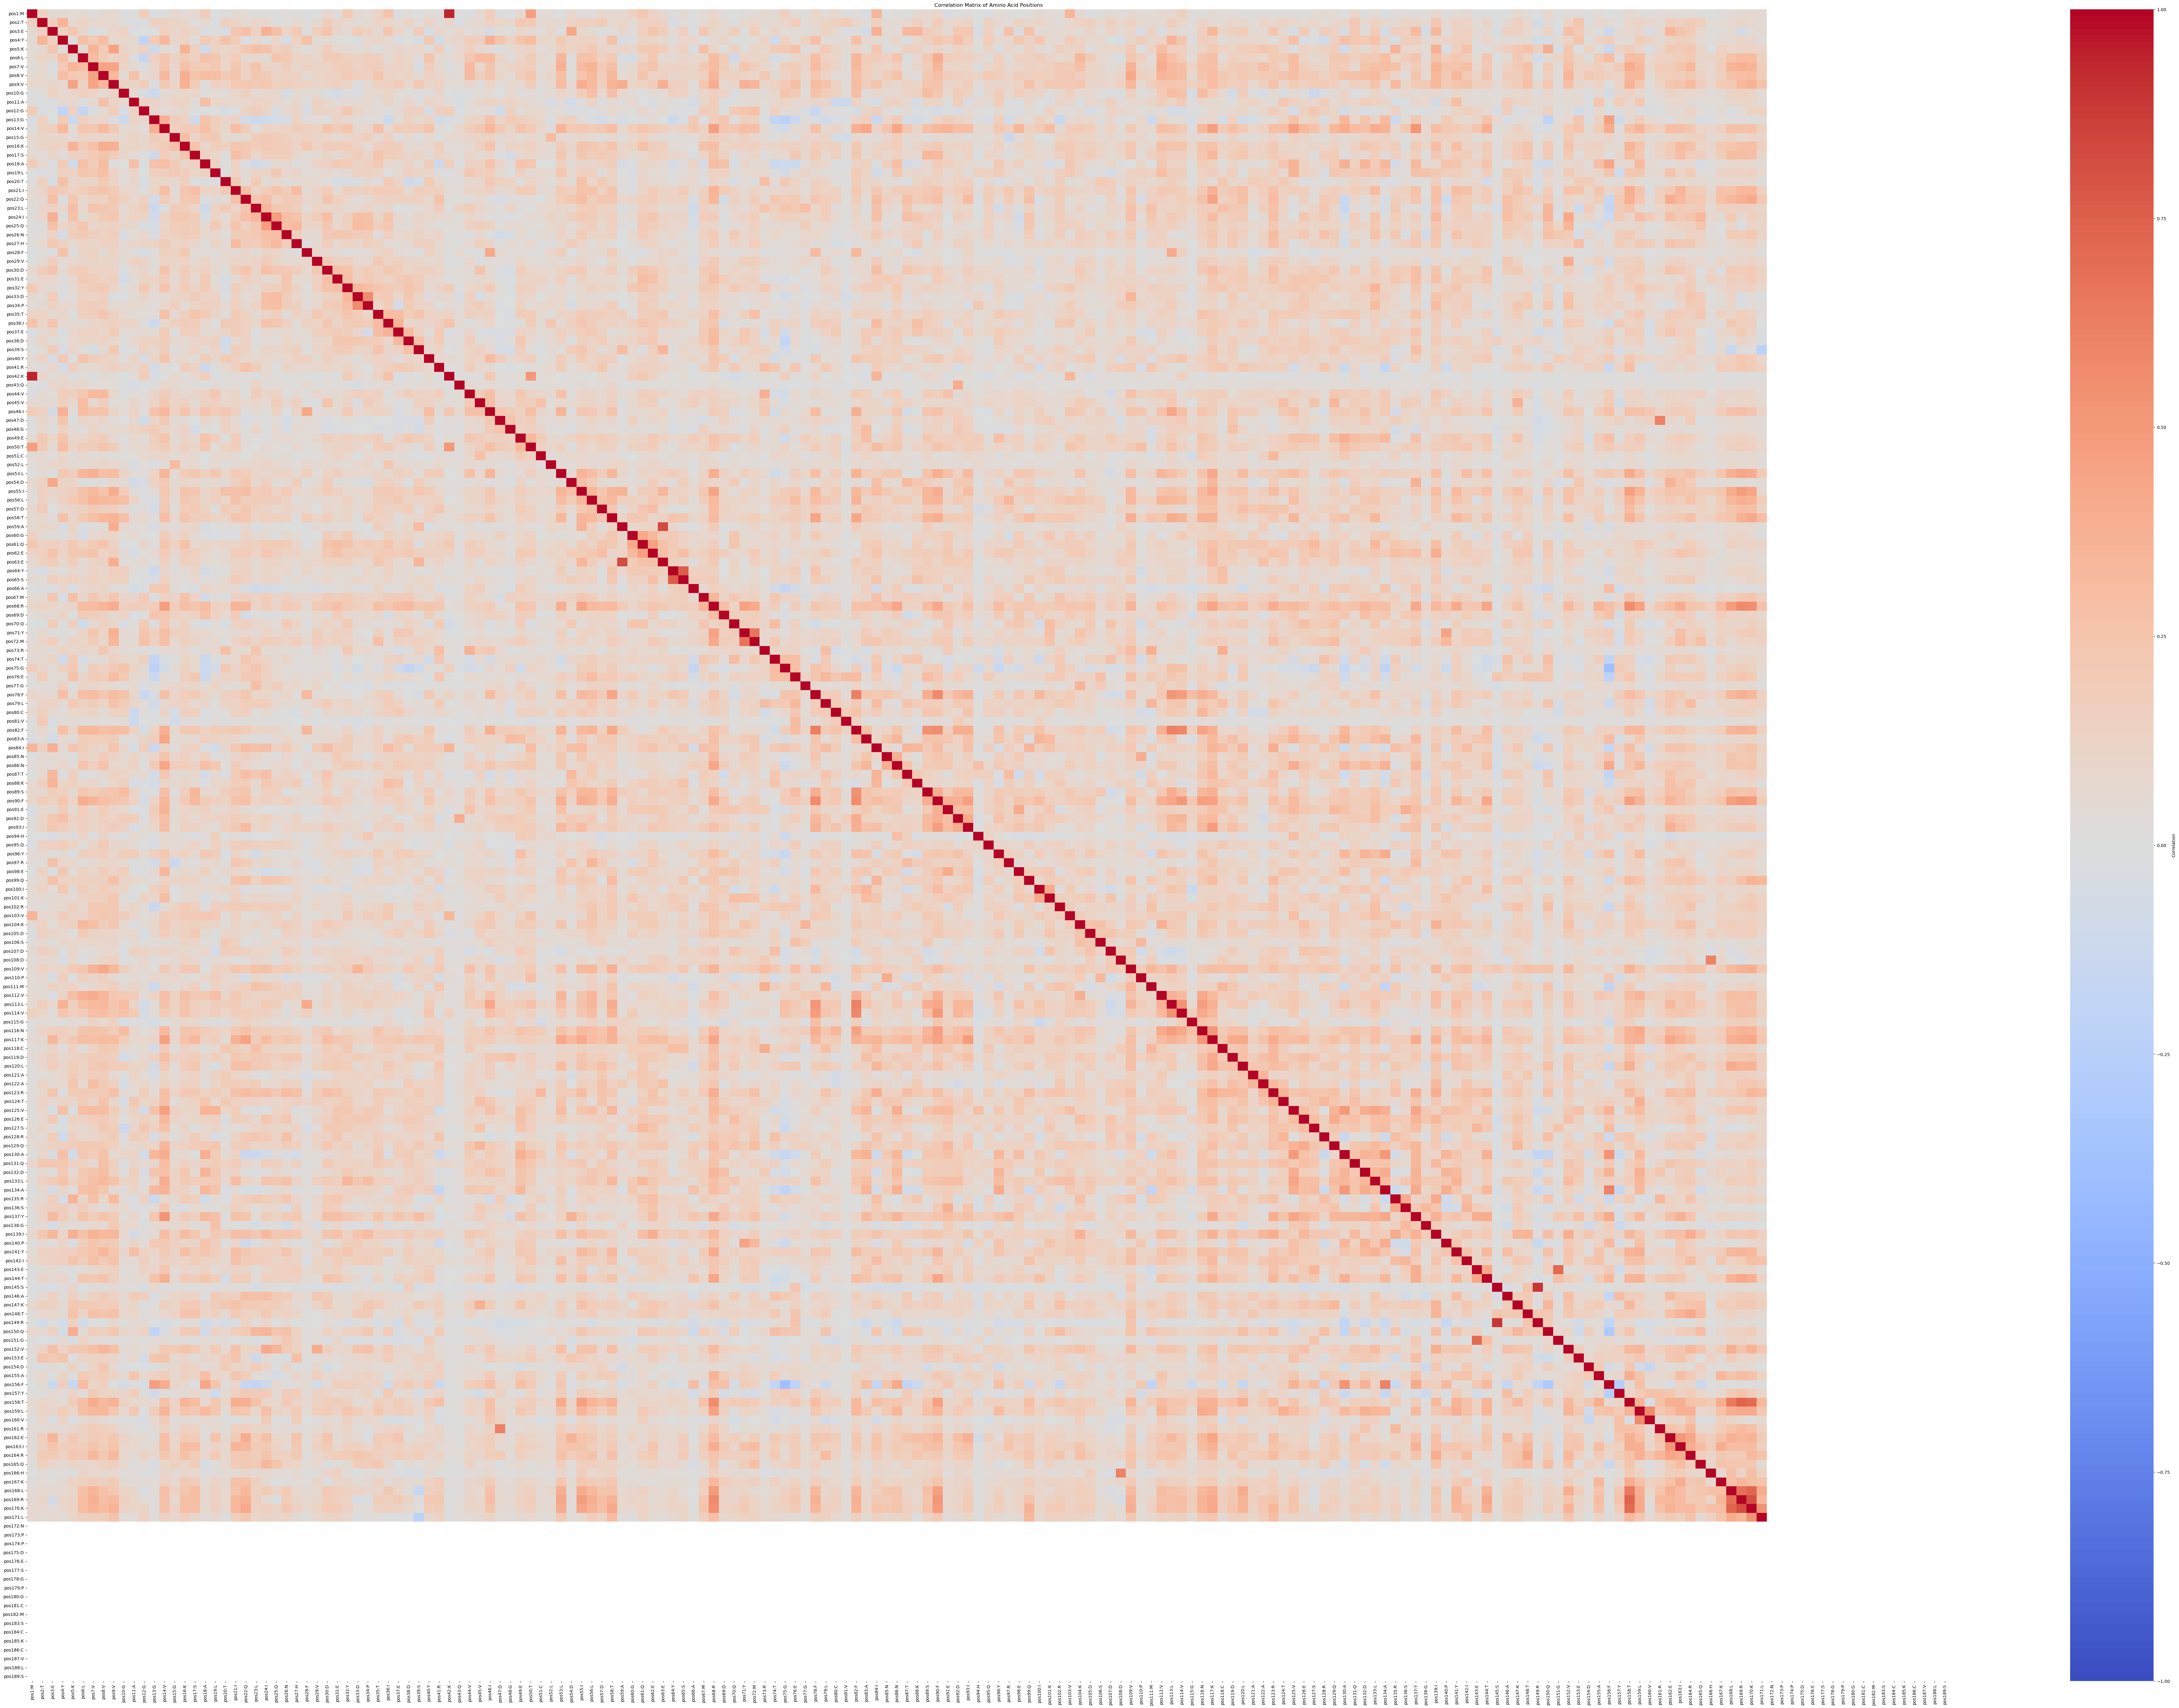

pos58:T    -0.217475
pos162:E    0.143654
pos55:I    -0.142333
pos73:R     0.135194
pos102:R    0.129331
pos67:M     0.128089
pos64:Y    -0.127780
pos35:T     0.127693
pos32:Y     0.122514
pos50:T     0.119467
dtype: float64

In [15]:
correlation_matrix = X.iloc[:, :len(feature_normalized_df.columns)].corr()


correlation_with_target = X.iloc[:, :len(feature_normalized_df.columns)].apply(lambda x: x.corr(pd.Series(y_factorized)))


plt.figure(figsize=(100, 70))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Amino Acid Positions')
plt.show()


correlation_with_target_abs = correlation_with_target.abs().sort_values(ascending=False)
correlation_with_target_sorted = correlation_with_target[correlation_with_target_abs.index]
correlation_with_target_sorted.head(10)

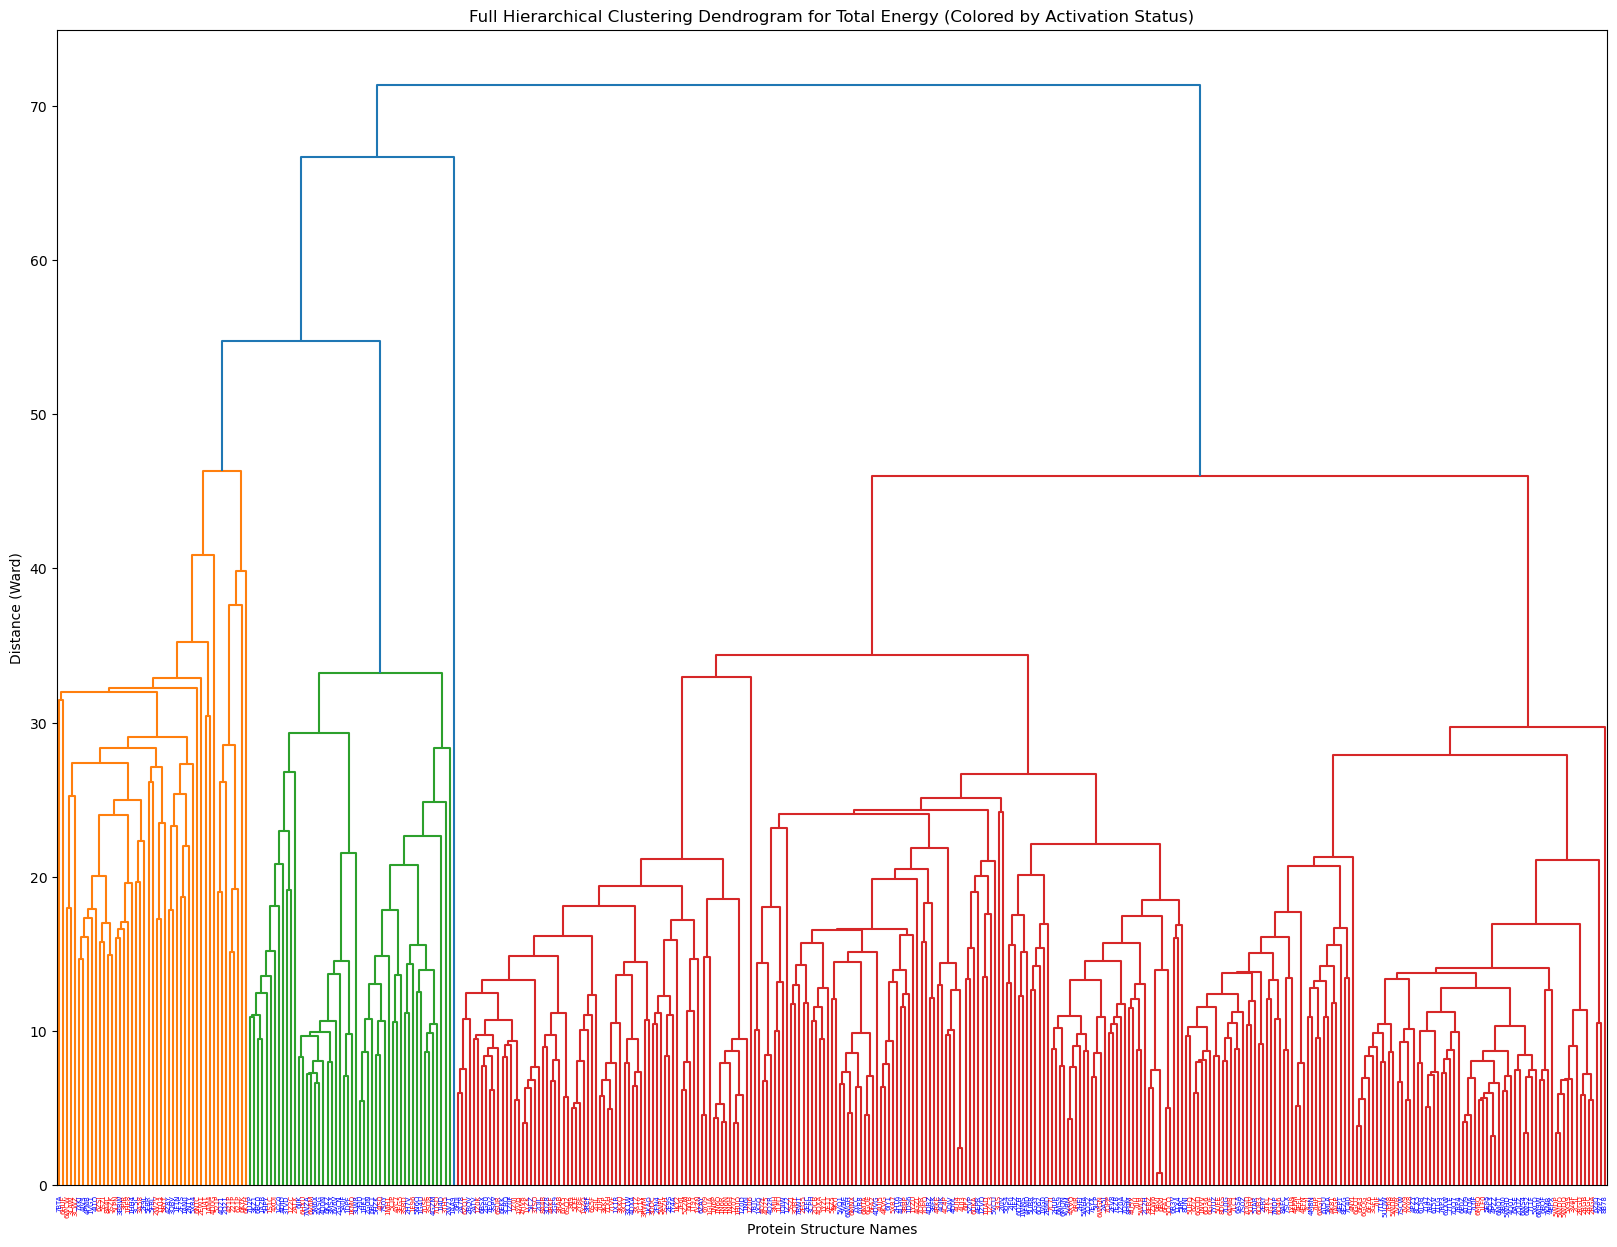

In [16]:
linked = linkage(feature_normalized, method='ward')


color_map = {
    "active": "red",
    "inactive": "blue"
}


labels = df["Unnamed: 0"].values


plt.figure(figsize=(20,15))
dendro_data = dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=labels)


ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    structure_id = lbl.get_text()
    color = color_map[merged_df[merged_df["Unnamed: 0"] == structure_id]["Read Activity Status"].values[0]]
    lbl.set_color(color)

plt.title('Full Hierarchical Clustering Dendrogram for Total Energy (Colored by Activation Status)')
plt.xlabel('Protein Structure Names')
plt.ylabel('Distance (Ward)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [17]:
merged_df = pd.merge(feature_normalized_df, metadata_df, left_on=protein_codes, right_on="Unnamed: 0")


X = feature_normalized_df
y = merged_df["Read Activity Status"]


merged_df.head()

pos1:M    pos2:T    pos3:E    pos4:Y    pos5:K    pos6:L    pos7:V  \
0 -0.117214  1.306119 -0.693412  0.000000  0.074375  1.212173 -0.314369   
1  1.099927  1.903896 -0.186614  1.295191  2.252574  5.621678  7.432344   
2  0.241451 -0.970627 -0.353076 -0.641148  0.179644 -0.452226 -0.569569   
3  0.000000  0.000000  0.000000  3.461008  0.000000  0.000000  1.585761   
4  0.169762  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     pos8:V    pos9:V   pos10:G  ...  Number of ILE  Number of GLN  \
0 -0.073013  0.389946 -0.363697  ...             10              5   
1  5.695009  5.718141  2.714835  ...             11             11   
2  1.086234 -0.466234  0.291596  ...             11             11   
3  3.378327  2.136914  0.000000  ...              8              6   
4  0.000000  0.000000  6.964389  ...              8              6   

   Number of ASN  Number of HIS  Number of PHE  Number of ASP  Number of PRO  \
0              6            2.0              7             15           11.0   
1              4            3.0              5             14            3.0   
2              4            3.0              5             15            3.0   
3              5            2.0              8             11           12.0   
4              5            2.0              8             11           15.0   

   Number of ARG  Number of CYS  Number of TRP  
0             10            5.0            2.0  
1             12            3.0            NaN  
2             11            3.0            NaN  
3              5            5.0            1.0  
4              6            6.0            1.0  

[5 rows x 231 columns]

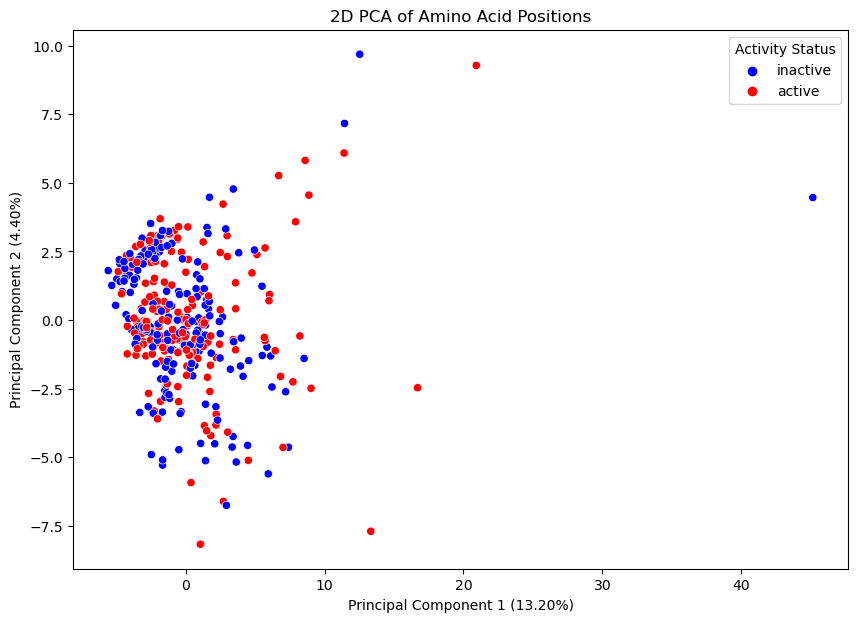

In [18]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.iloc[:, :len(feature_normalized_df.columns)])


pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Activity Status'] = y


explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Activity Status', data=pca_df, palette={"active": "red", "inactive": "blue"})


plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')

plt.title('2D PCA of Amino Acid Positions')
plt.show()

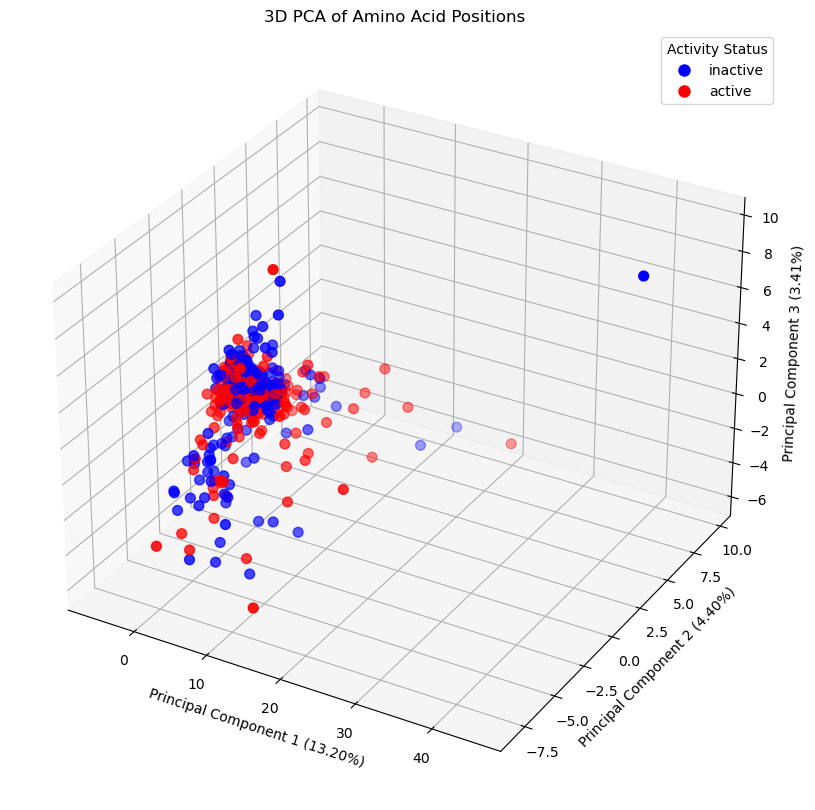

In [19]:
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(X)


pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df_3d['Activity Status'] = y


colors = {'inactive': 'blue', 'active': 'red'}


explained_variance_3d = pca_3d.explained_variance_ratio_


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d['Principal Component 1'], pca_df_3d['Principal Component 2'], pca_df_3d['Principal Component 3'], c=pca_df_3d["Activity Status"].map(colors), s=50, label=pca_df_3d["Activity Status"].unique())
ax.set_xlabel(f'Principal Component 1 ({explained_variance_3d[0]*100:.2f}%)')
ax.set_ylabel(f'Principal Component 2 ({explained_variance_3d[1]*100:.2f}%)')
ax.set_zlabel(f'Principal Component 3 ({explained_variance_3d[2]*100:.2f}%)')
ax.set_title('3D PCA of Amino Acid Positions')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=status, markersize=10, markerfacecolor=colors[status]) for status in colors]
ax.legend(handles=legend_handles, title='Activity Status')

plt.show()

C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


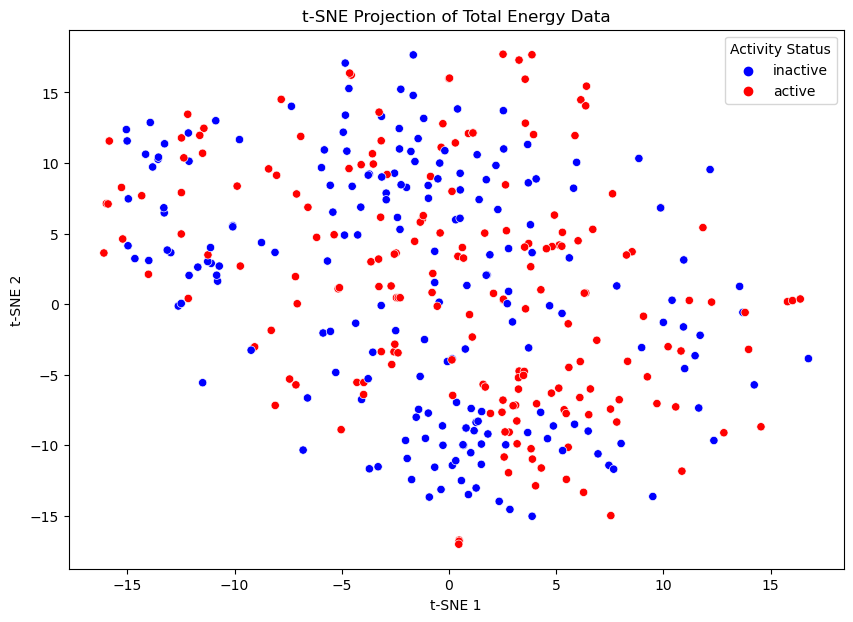

In [20]:
tsne = TSNE(n_components=2, random_state=1)
tsne_2d = tsne.fit_transform(X)


tsne_df = pd.DataFrame(data=tsne_2d, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Activity Status'] = y


plt.figure(figsize=(10, 7))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Activity Status', data=tsne_df, palette={"active": "red", "inactive": "blue"})
plt.title('t-SNE Projection of Total Energy Data')
plt.show()

In [21]:
label_encoder = LabelEncoder()
y_factorized = label_encoder.fit_transform(y)


rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_clf.fit(X.iloc[:, :len(feature_normalized_df.columns)], y_factorized)


feature_importances = rf_clf.feature_importances_


importance_df = pd.DataFrame({
    'Amino Acid Position': X.columns[:len(feature_normalized_df.columns)],
    'Importance': feature_importances
})


sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)


top_n = 15
selected_aminoacids = sorted_importance_df['Amino Acid Position'][:top_n]
sorted_importance_df

Amino Acid Position  Importance
57              pos58:T    0.025573
63              pos64:Y    0.023075
31              pos32:Y    0.022830
80              pos81:V    0.020642
32              pos33:D    0.016370
..                  ...         ...
175            pos176:E    0.000000
174            pos175:D    0.000000
172            pos173:P    0.000000
171            pos172:N    0.000000
188            pos189:S    0.000000

[189 rows x 2 columns]

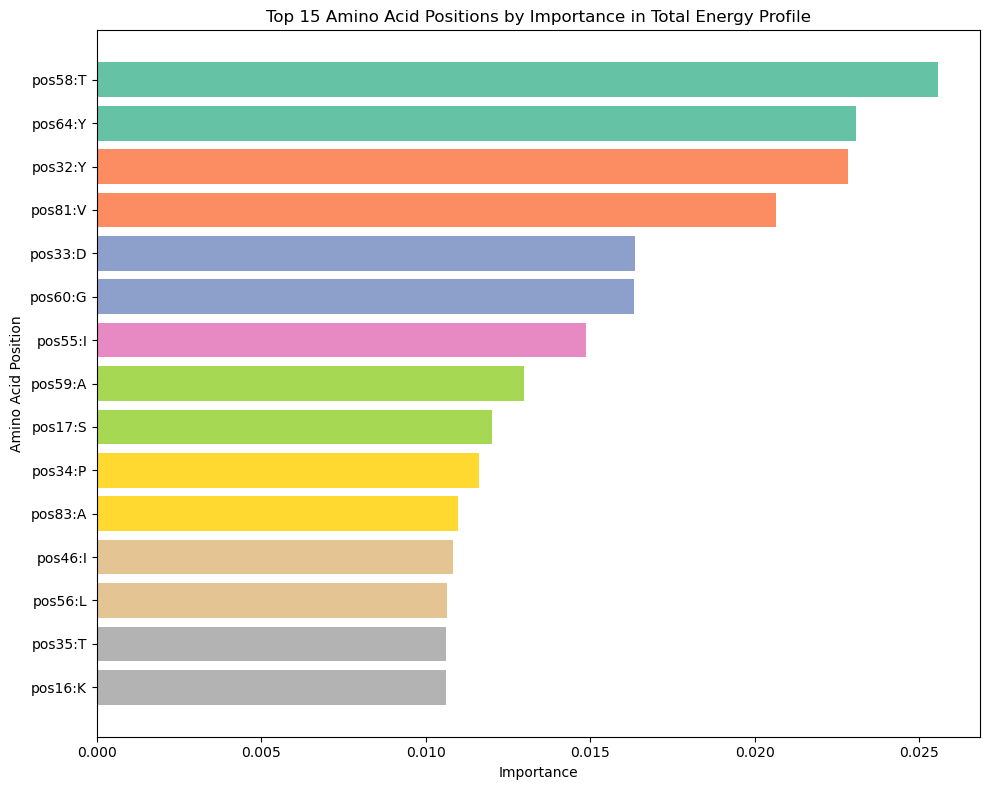

In [22]:
top_features = sorted_importance_df.head(top_n)


colors = cm.Set2(np.linspace(0, 1, top_n))


plt.figure(figsize=(10, 8))
bars = plt.barh(top_features['Amino Acid Position'], top_features['Importance'], color=colors)
plt.gca().invert_yaxis()  # to have the most important feature at the top
plt.title('Top {} Amino Acid Positions by Importance in Total Energy Profile'.format(top_n))
plt.xlabel('Importance')
plt.ylabel('Amino Acid Position')
plt.tight_layout()
plt.show()

C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

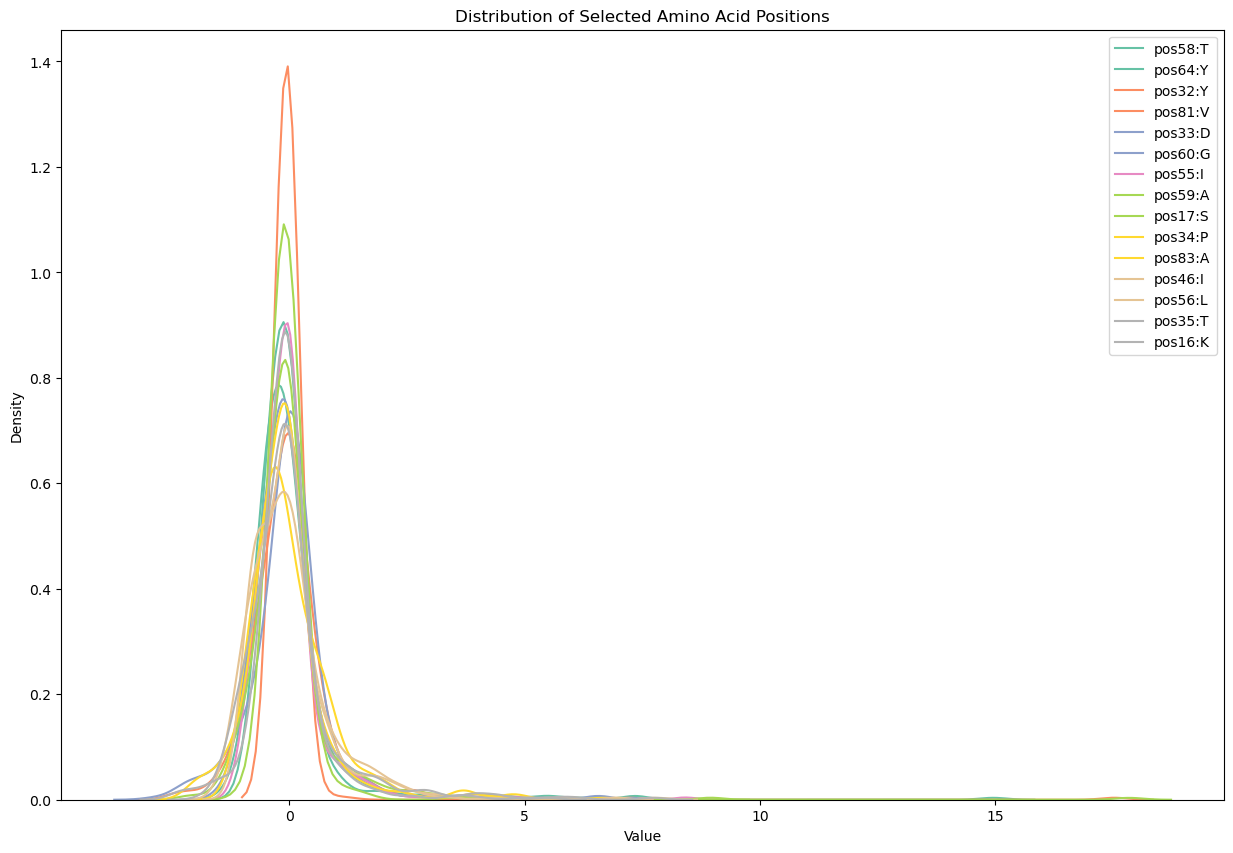

In [23]:
colors = cm.Set2(np.linspace(0, 1, len(selected_aminoacids)))


hex_colors = [to_hex(color) for color in colors]


color_dict = dict(zip(selected_aminoacids, hex_colors))


plt.figure(figsize=(15, 10))
for position in selected_aminoacids:
    sns.distplot(X[position], label=position, hist=False, color=color_dict[position])

plt.title('Distribution of Selected Amino Acid Positions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

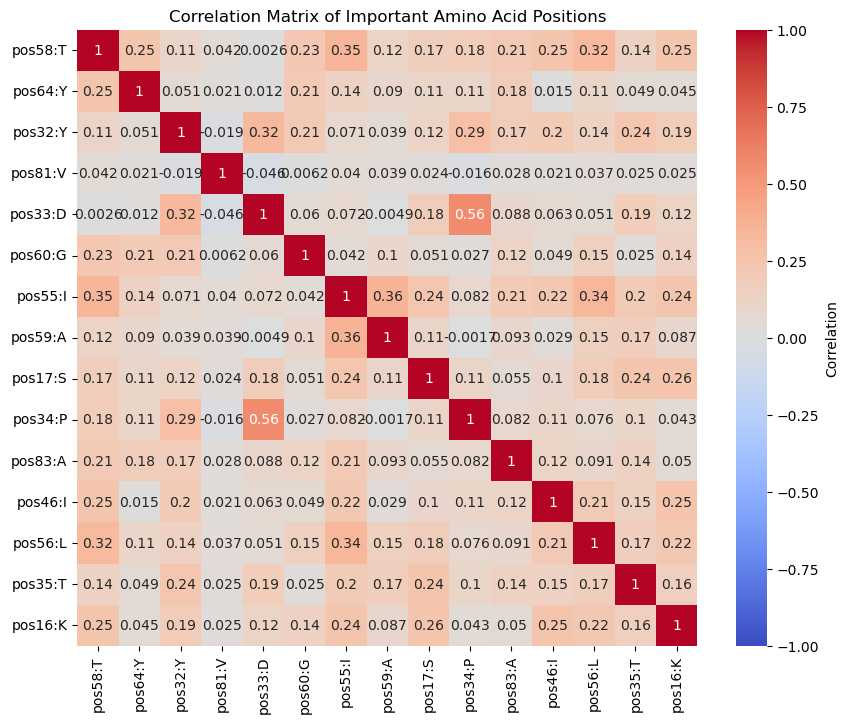

In [24]:
selected_correlation_matrix = correlation_matrix.loc[selected_aminoacids, selected_aminoacids]


plt.figure(figsize=(10, 8))
sns.heatmap(selected_correlation_matrix, cmap="coolwarm", annot=True, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Important Amino Acid Positions')
plt.show()

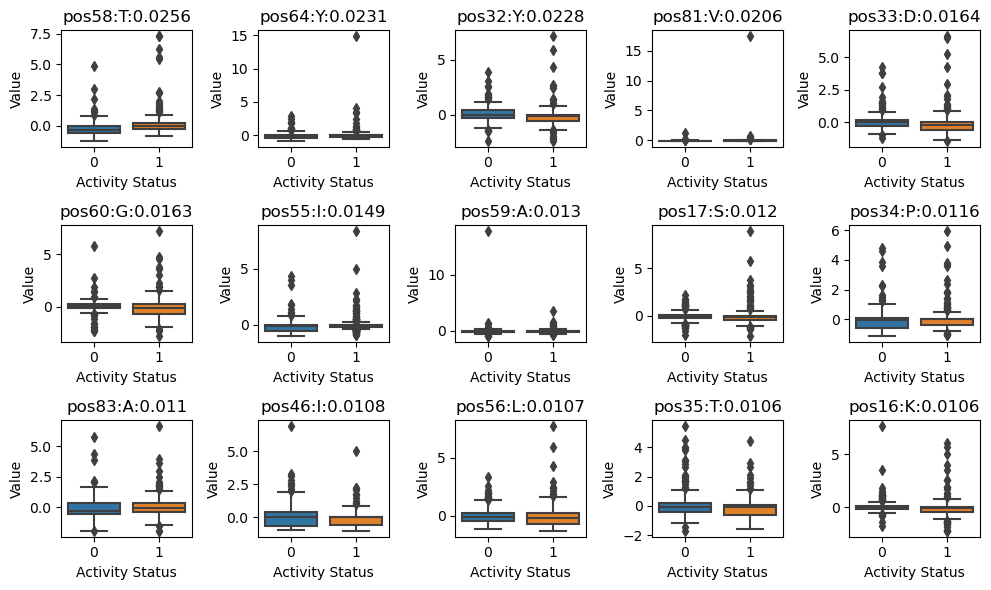

In [25]:
plt.figure(figsize=(10, 6))
for idx, position in enumerate(selected_aminoacids):
    plt.subplot(3, 5, idx+1)
    sns.boxplot(x=y_factorized, y=X[position])
    plt.title(f'{position}:{round(sorted_importance_df.iloc[idx, sorted_importance_df.columns.get_loc("Importance")], 4)}')
    plt.xlabel('Activity Status')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

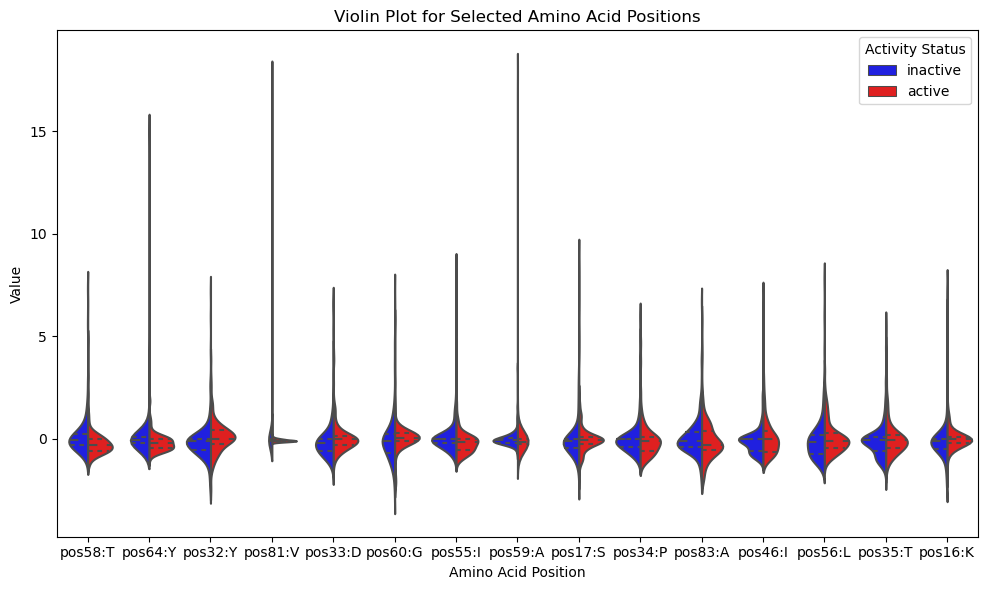

In [26]:
melted_data_selected = pd.melt(X[selected_aminoacids], value_vars=selected_aminoacids)
melted_data_selected['Activity Status'] = np.tile(y, len(selected_aminoacids))


plt.figure(figsize=(10, 6))
sns.violinplot(x="variable", y="value", hue="Activity Status", data=melted_data_selected, split=True, inner="quart", palette={"active": "red", "inactive": "blue"})
plt.title('Violin Plot for Selected Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Activity Status')
plt.tight_layout()
plt.show()

In [27]:
active_data = X[y == "active"][selected_aminoacids]
inactive_data = X[y == "inactive"][selected_aminoacids]


t_stats = []
p_values = []

for position in selected_aminoacids:
    t_stat, p_value = ttest_ind(active_data[position], inactive_data[position])
    t_stats.append(t_stat)
    p_values.append(p_value)


t_test_results = pd.DataFrame({
    'Amino Acid Position': selected_aminoacids,
    'T-Statistic': t_stats,
    'P-Value': p_values
})

t_test_results

Amino Acid Position  T-Statistic   P-Value
57             pos58:T    -4.337607  0.000018
63             pos64:Y    -2.508163  0.012553
31             pos32:Y     2.403199  0.016732
80             pos81:V    -1.284274  0.199831
32             pos33:D     1.292770  0.196878
59             pos60:G     0.844658  0.398835
54             pos55:I    -2.799425  0.005381
58             pos59:A    -0.162385  0.871089
16             pos17:S    -0.772356  0.440385
33             pos34:P    -1.224189  0.221641
82             pos83:A    -1.568979  0.117487
45             pos46:I     2.119191  0.034724
55             pos56:L     0.639155  0.523108
34             pos35:T     2.506440  0.012613
15             pos16:K     1.306122  0.192303

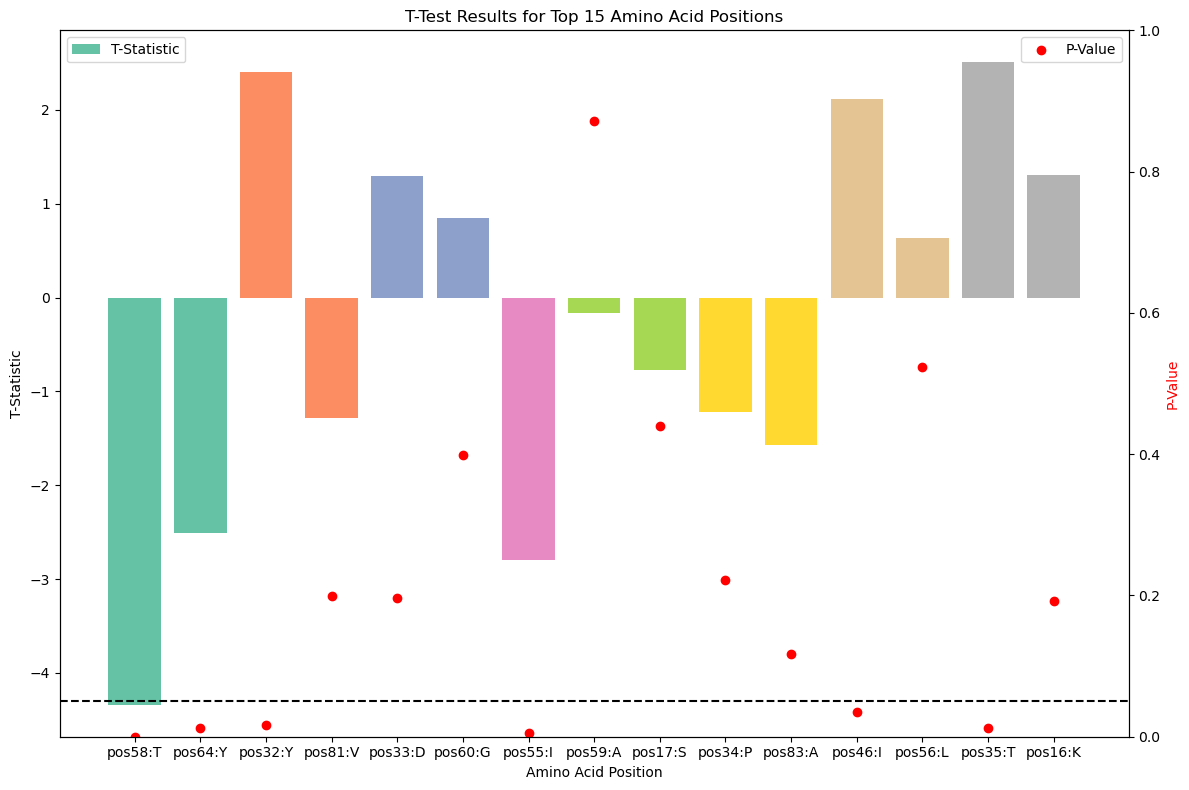

In [32]:
colors = cm.Set2(np.linspace(0, 1, top_n))


fig, ax1 = plt.subplots(figsize=(12, 8))


bars = ax1.bar(t_test_results['Amino Acid Position'], t_test_results['T-Statistic'], color=colors, label='T-Statistic')


ax2 = ax1.twinx()
ax2.scatter(t_test_results['Amino Acid Position'], t_test_results['P-Value'], color='red', marker='o', label='P-Value')
ax2.axhline(y=0.05, color='black', linestyle='--')  # significance threshold


ax2.set_ylim(0, 1)


ax1.set_ylabel('T-Statistic')
ax2.set_ylabel('P-Value', color='red')
ax1.set_xlabel('Amino Acid Position')
ax1.set_title(f'T-Test Results for Top {top_n} Amino Acid Positions')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [29]:
bonferroni_corrected_pvalues = multipletests(t_test_results['P-Value'], method='bonferroni')[1]


fdr_corrected_pvalues = multipletests(t_test_results['P-Value'], method='fdr_bh')[1]


t_test_results['Bonferroni Corrected P-Value'] = bonferroni_corrected_pvalues
t_test_results['FDR Corrected P-Value'] = fdr_corrected_pvalues

t_test_results

Amino Acid Position  T-Statistic   P-Value  Bonferroni Corrected P-Value  \
57             pos58:T    -4.337607  0.000018                      0.000277   
63             pos64:Y    -2.508163  0.012553                      0.188296   
31             pos32:Y     2.403199  0.016732                      0.250982   
80             pos81:V    -1.284274  0.199831                      1.000000   
32             pos33:D     1.292770  0.196878                      1.000000   
59             pos60:G     0.844658  0.398835                      1.000000   
54             pos55:I    -2.799425  0.005381                      0.080718   
58             pos59:A    -0.162385  0.871089                      1.000000   
16             pos17:S    -0.772356  0.440385                      1.000000   
33             pos34:P    -1.224189  0.221641                      1.000000   
82             pos83:A    -1.568979  0.117487                      1.000000   
45             pos46:I     2.119191  0.034724                      0.520861   
55             pos56:L     0.639155  0.523108                      1.000000   
34             pos35:T     2.506440  0.012613                      0.189201   
15             pos16:K     1.306122  0.192303                      1.000000   

    FDR Corrected P-Value  
57               0.000277  
63               0.047300  
31               0.050196  
80               0.299746  
32               0.299746  
59               0.498544  
54               0.040359  
58               0.871089  
16               0.508137  
33               0.302238  
82               0.251758  
45               0.086810  
55               0.560473  
34               0.047300  
15               0.299746

In [30]:
t_test_results.to_clipboard()

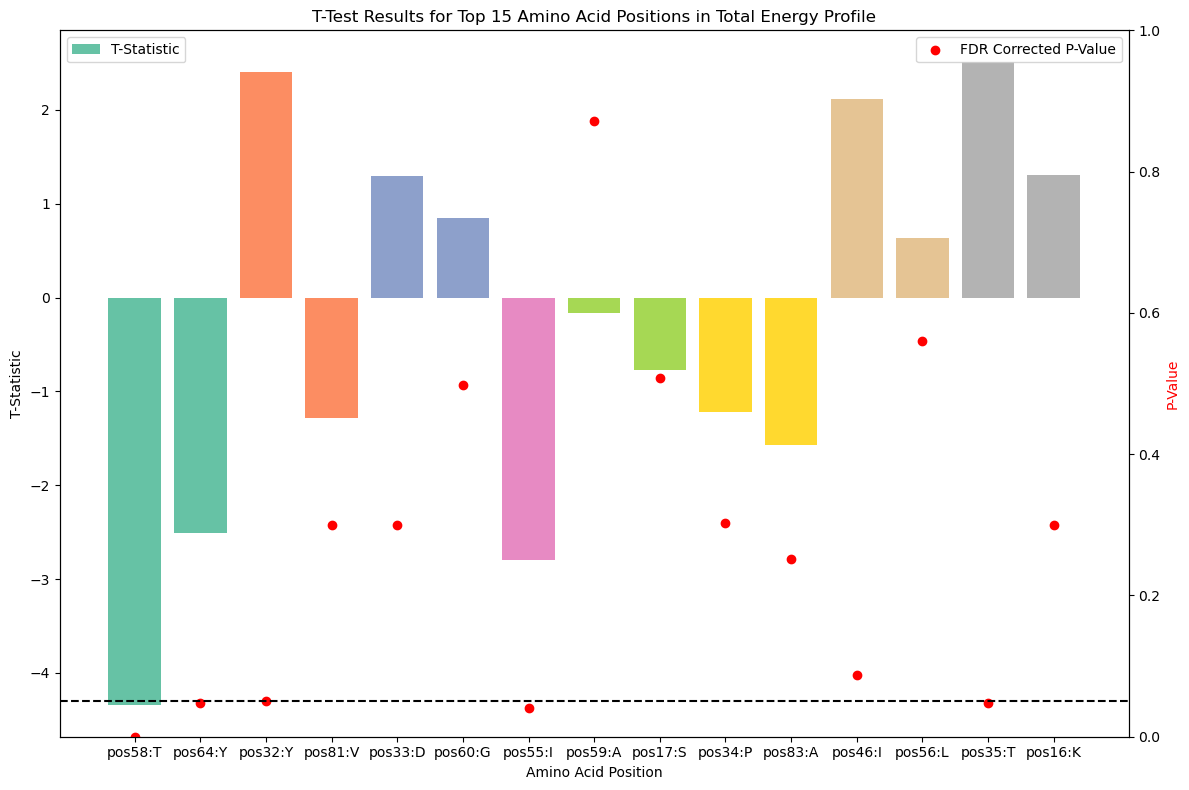

In [31]:
colors = cm.Set2(np.linspace(0, 1, top_n))


fig, ax1 = plt.subplots(figsize=(12,8))


bars = ax1.bar(t_test_results['Amino Acid Position'], t_test_results['T-Statistic'], color=colors, label='T-Statistic')


ax2 = ax1.twinx()
ax2.scatter(t_test_results['Amino Acid Position'], t_test_results['FDR Corrected P-Value'], color='red', marker='o', label='FDR Corrected P-Value')
ax2.axhline(y=0.05, color='black', linestyle='--')  # significance threshold


ax2.set_ylim(0, 1)


ax1.set_ylabel('T-Statistic')
ax2.set_ylabel('P-Value', color='red')
ax1.set_xlabel('Amino Acid Position')
ax1.set_title(f'T-Test Results for Top {top_n} Amino Acid Positions in Total Energy Profile')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()